In [46]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt

In [47]:
product = 'BATS_BATS_CORN'
order   = '(2,2)'

In [48]:
forcast_df         = pd.read_csv(r'C:\Users\James Stanley\Documents\GitHub\backtest_utilities\forecasts_BATS_CORN_(2, 2)_True_5.csv',parse_dates=True,index_col='asofdate')
metadata_df        = pd.read_csv(r'C:\Users\James Stanley\Documents\GitHub\backtest_utilities\metadata_BATS_CORN_(2, 2)_True_5.csv',parse_dates=True,index_col='asofdate')
metadatasummary_df = pd.read_csv(r'C:\Users\James Stanley\Documents\GitHub\backtest_utilities\metadatasummary_BATS_BATS_CORN_arma_(2,2).csv',parse_dates=True)
pnl_df             = pd.read_csv(r'C:\Users\James Stanley\Documents\GitHub\backtest_utilities\pnl_armaspreadthreshold_BATS_CORN_(2, 2)_True_5.csv',parse_dates=True,index_col='asofdate')
positions_df       = pd.read_csv(r'C:\Users\James Stanley\Documents\GitHub\backtest_utilities\positions_BATS_BATS_CORN_arma_ma50_(2,2).csv',parse_dates=True,index_col='asofdate')
trade_pnl          = pd.read_csv(r'C:\Users\James Stanley\Documents\GitHub\backtest_utilities\tradelevelpnl_armaspreadthreshold_BATS_CORN_(2, 2)_True_5.csv',parse_dates=True,index_col='asofdate') 
performance_df     = pd.read_csv(r'C:\Users\James Stanley\Documents\GitHub\backtest_utilities\tradeperformance_BATS_BATS_CORN_arma_ma50_(2,2).csv',parse_dates=True)

FileNotFoundError: [Errno 2] No such file or directory: 'C:\\Users\\James Stanley\\Documents\\GitHub\\backtest_utilities\\tradelevelpnl_armaspreadthreshold_BATS_BATS_CORN_arma_ma50_(2,2)_True_5.csv'

In [ ]:
metadatasummary_df

,Unnamed: 0,0
0,Unnamed: 0,528.500000
1,aic,-1572.466126
2,bic,-1551.289552
3,hqic,-1563.945111
4,mae,0.008277
5,mse,0.000147
6,forecastHorizon,5.000000
7,diff,1.000000
8,trainDFLength,252.000000
9,num_models,5500.000000


In [ ]:
performance_df

,Unnamed: 0,No._Trades,Hit_Rate,Minimum,Maximum,Mean,Variance,Std_Dev,Skew,Kurtosis
0,0,560,0.958855,-1.05,5.68,0.639832,0.389443,0.624054,NaN,NaN


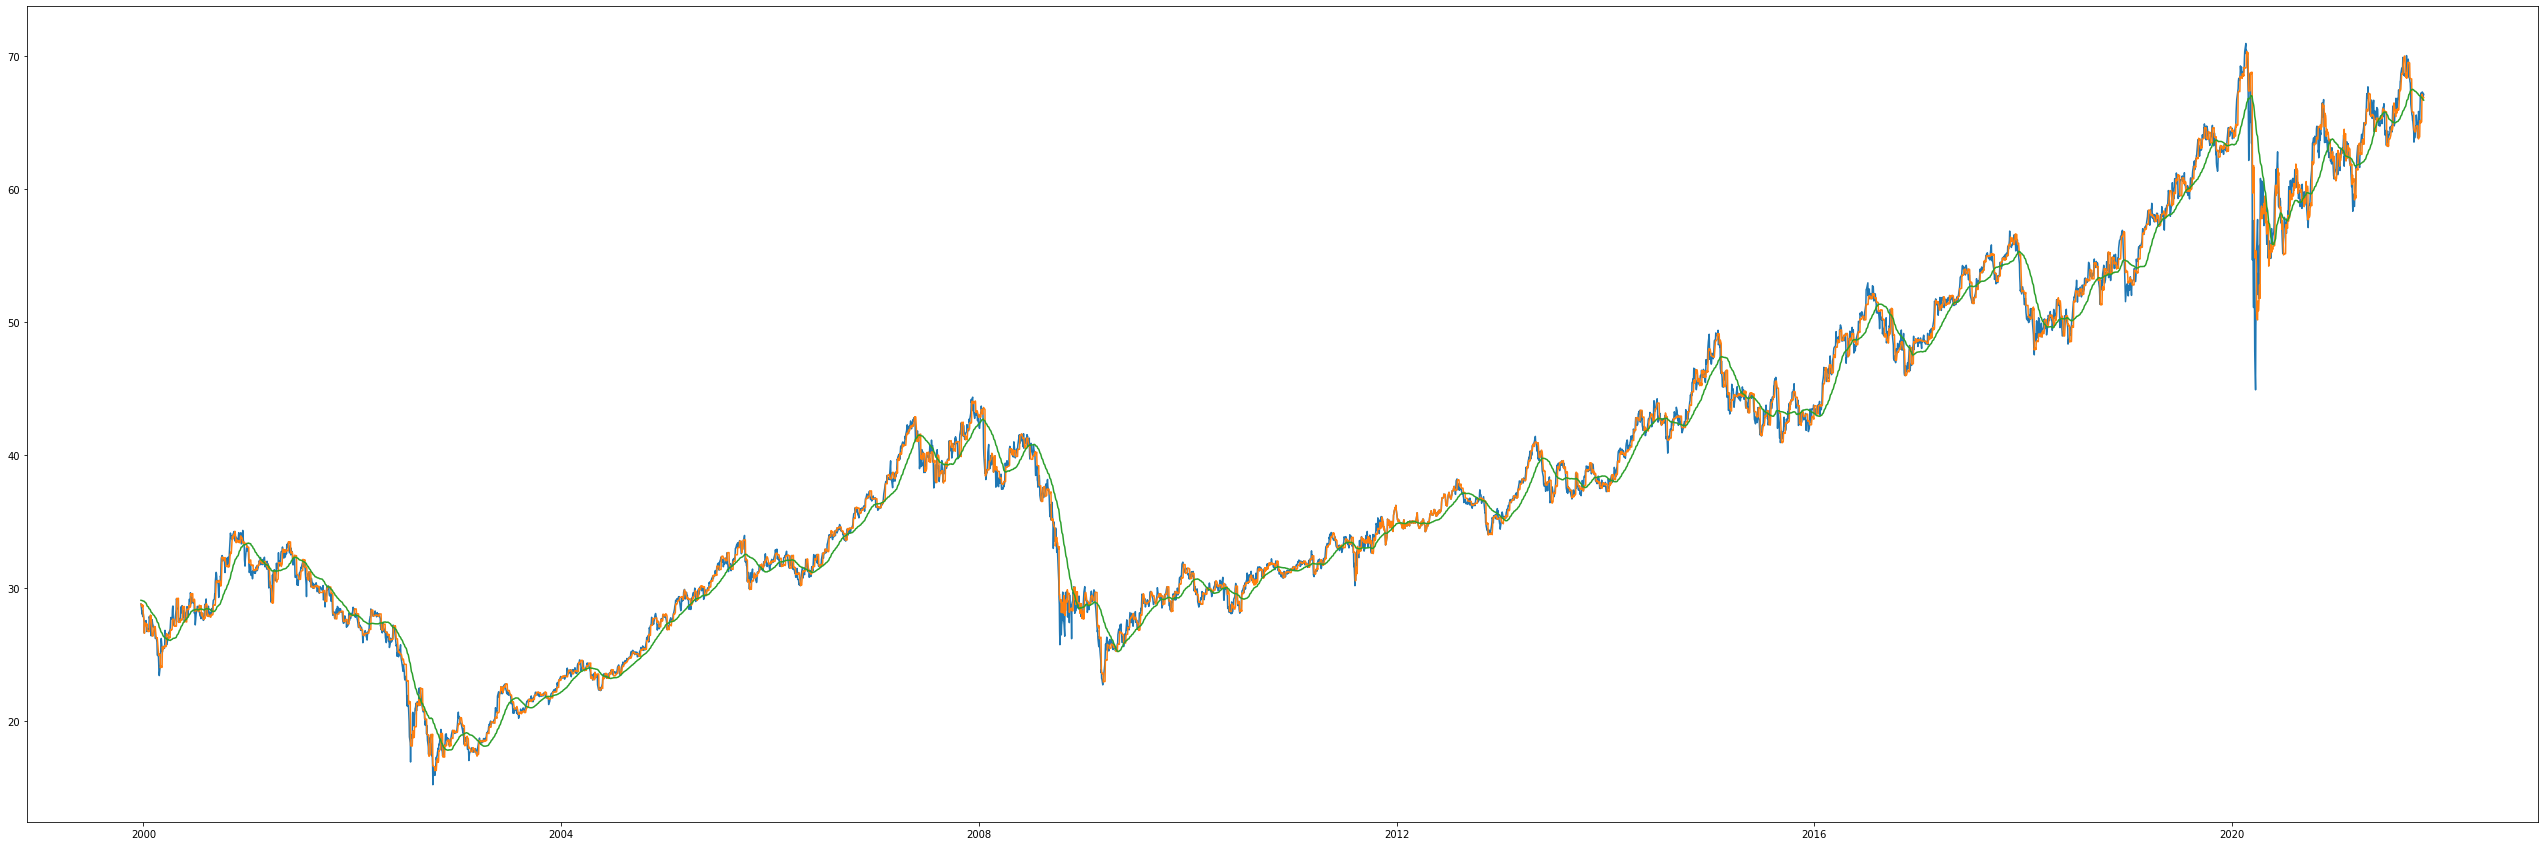

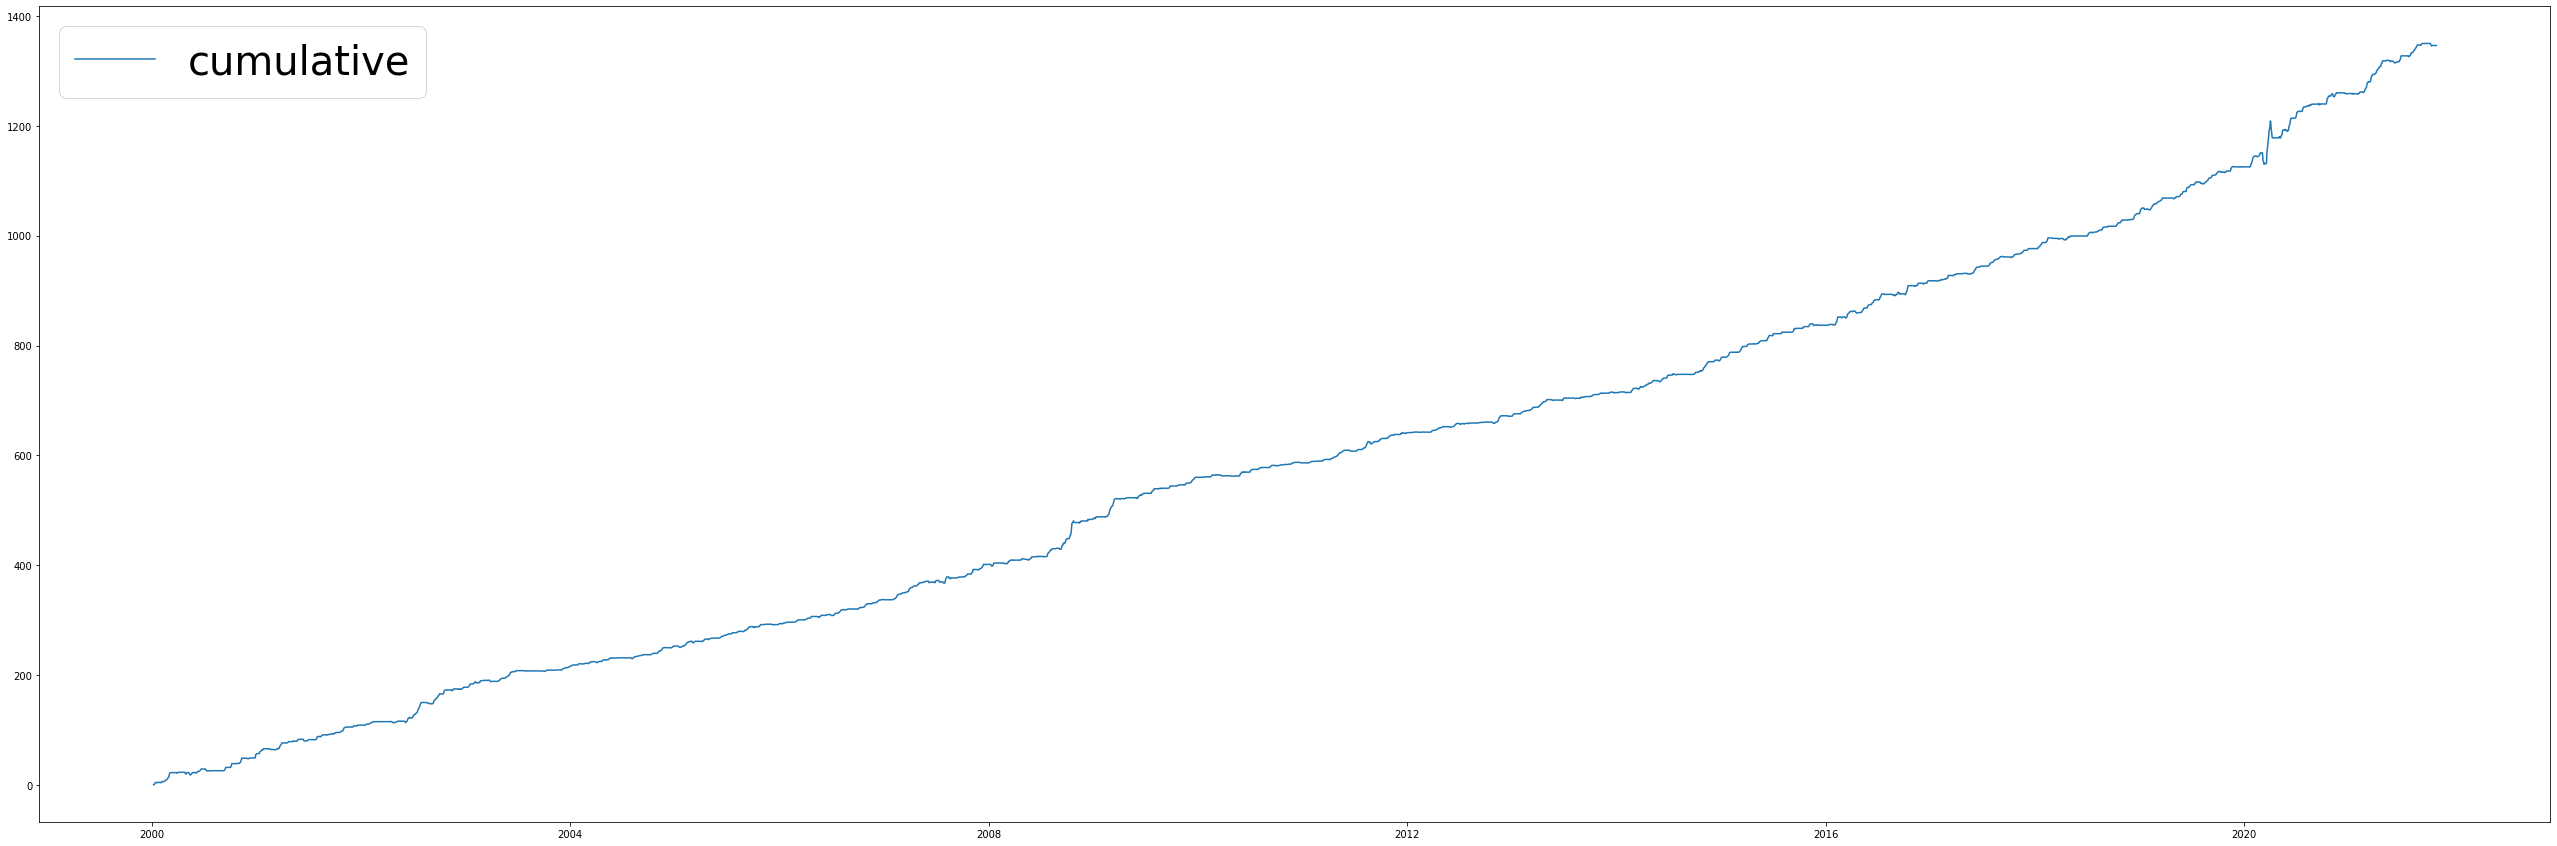

In [ ]:
plt.figure(figsize=(45,15))

plt.plot(forcast_df['close'])
plt.plot(forcast_df['pointForecast'])
plt.plot(forcast_df['MA_50'])

plt.show()

plt.figure(figsize=(45,15))

plt.plot(pnl_df['pnl'].cumsum())

plt.legend(['cumulative'],fontsize=40)

plt.show()


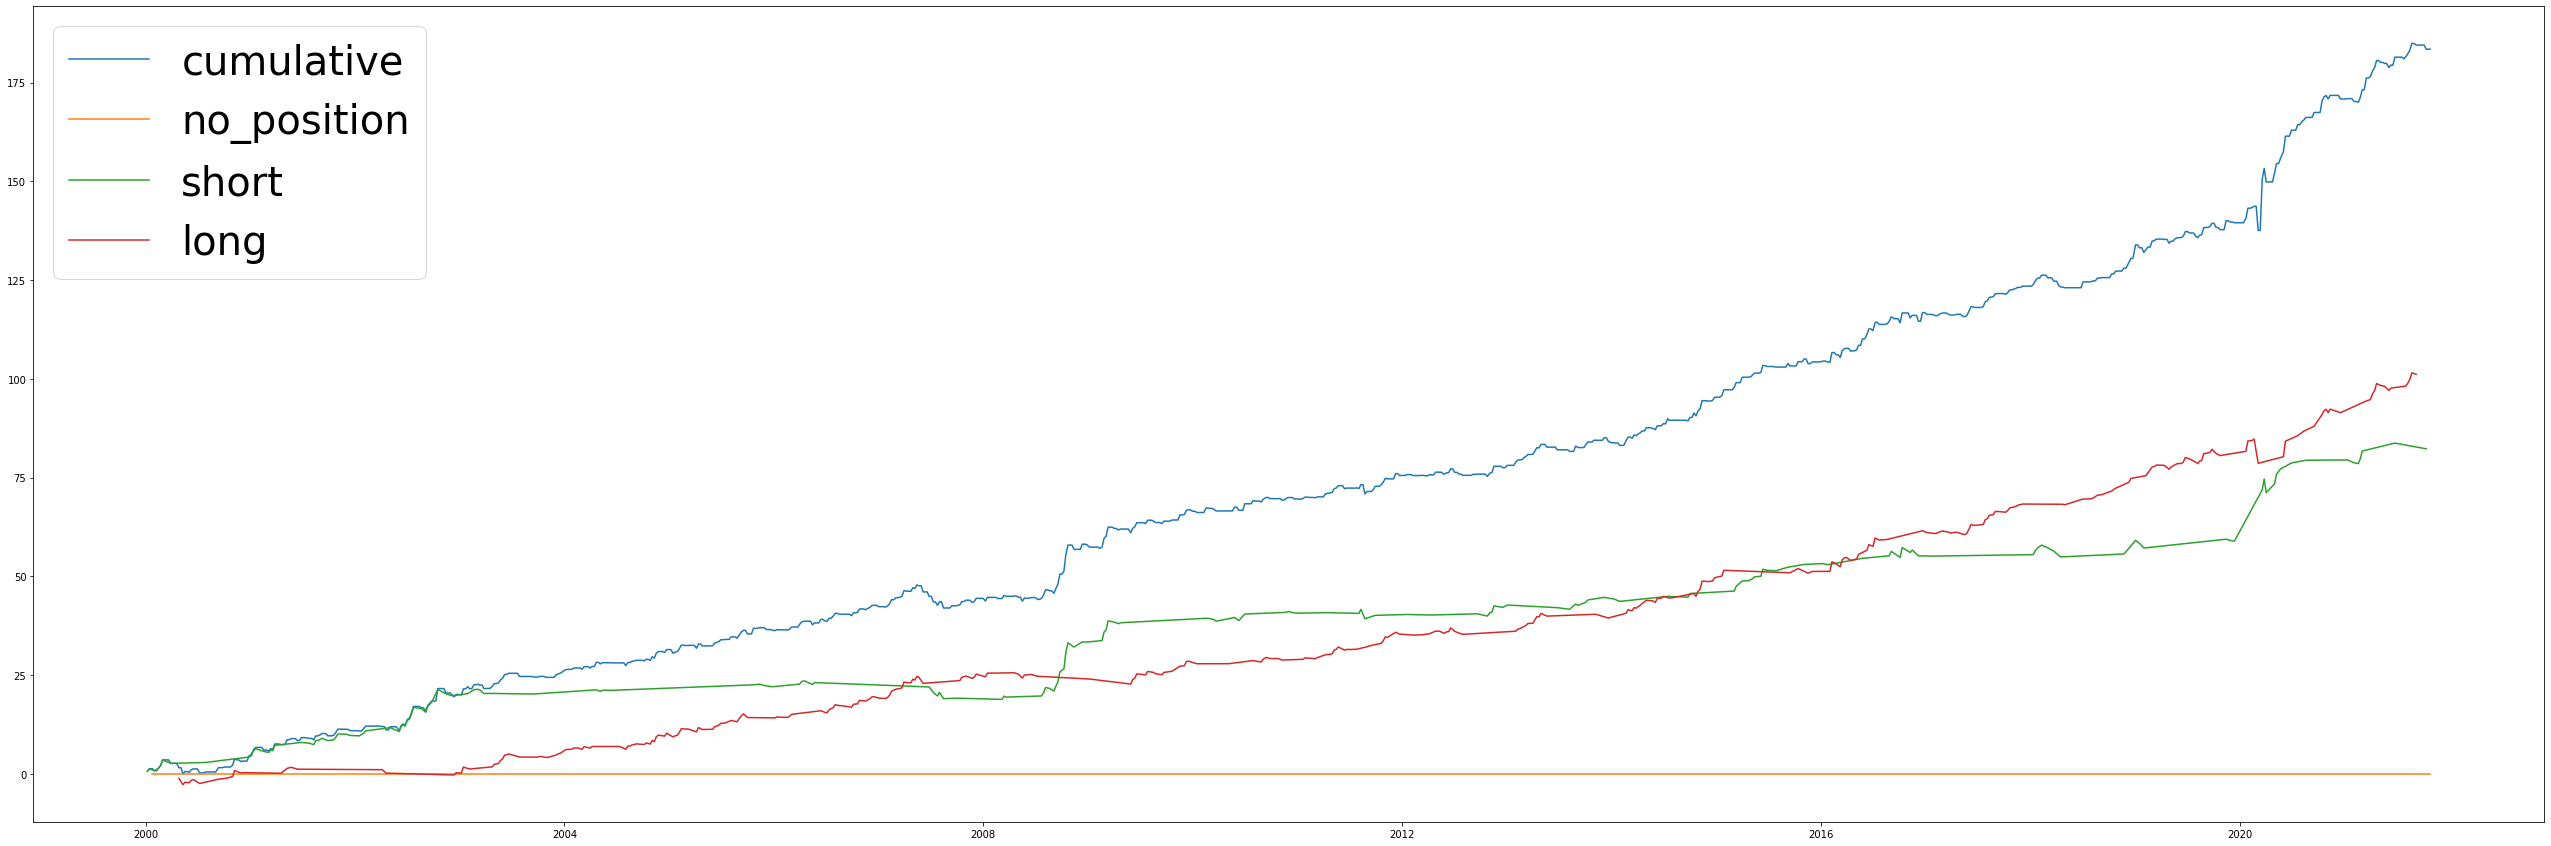

In [ ]:
plt.figure(figsize=(45,15))

plt.plot(trade_pnl['pnl'].cumsum())

plt.plot(trade_pnl[trade_pnl['positionType'] == 'no_position']['pnl'].cumsum())
plt.plot(trade_pnl[trade_pnl['positionType'] == 'short']['pnl'].cumsum())
plt.plot(trade_pnl[trade_pnl['positionType'] == 'long']['pnl'].cumsum())

plt.legend(['cumulative','no_position','short','long'],fontsize=40)

plt.show()


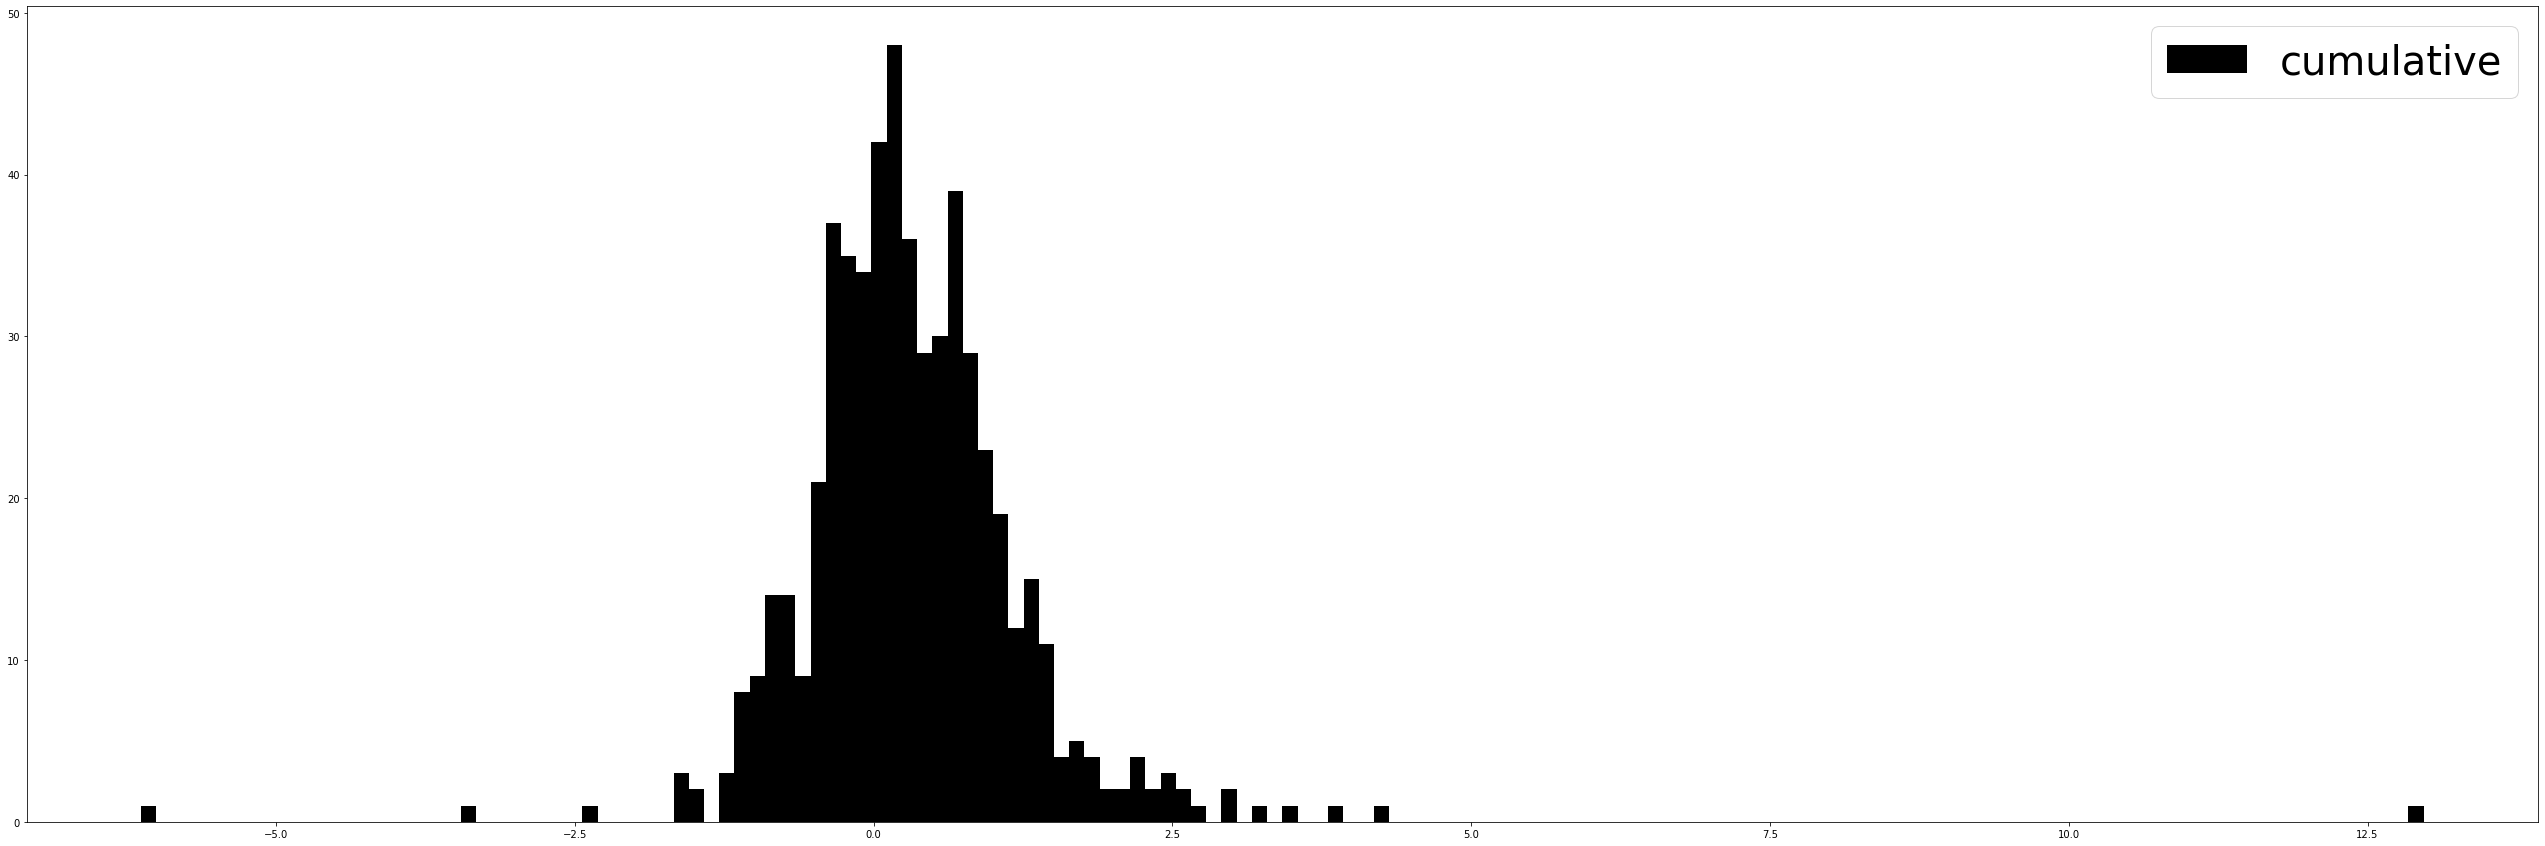

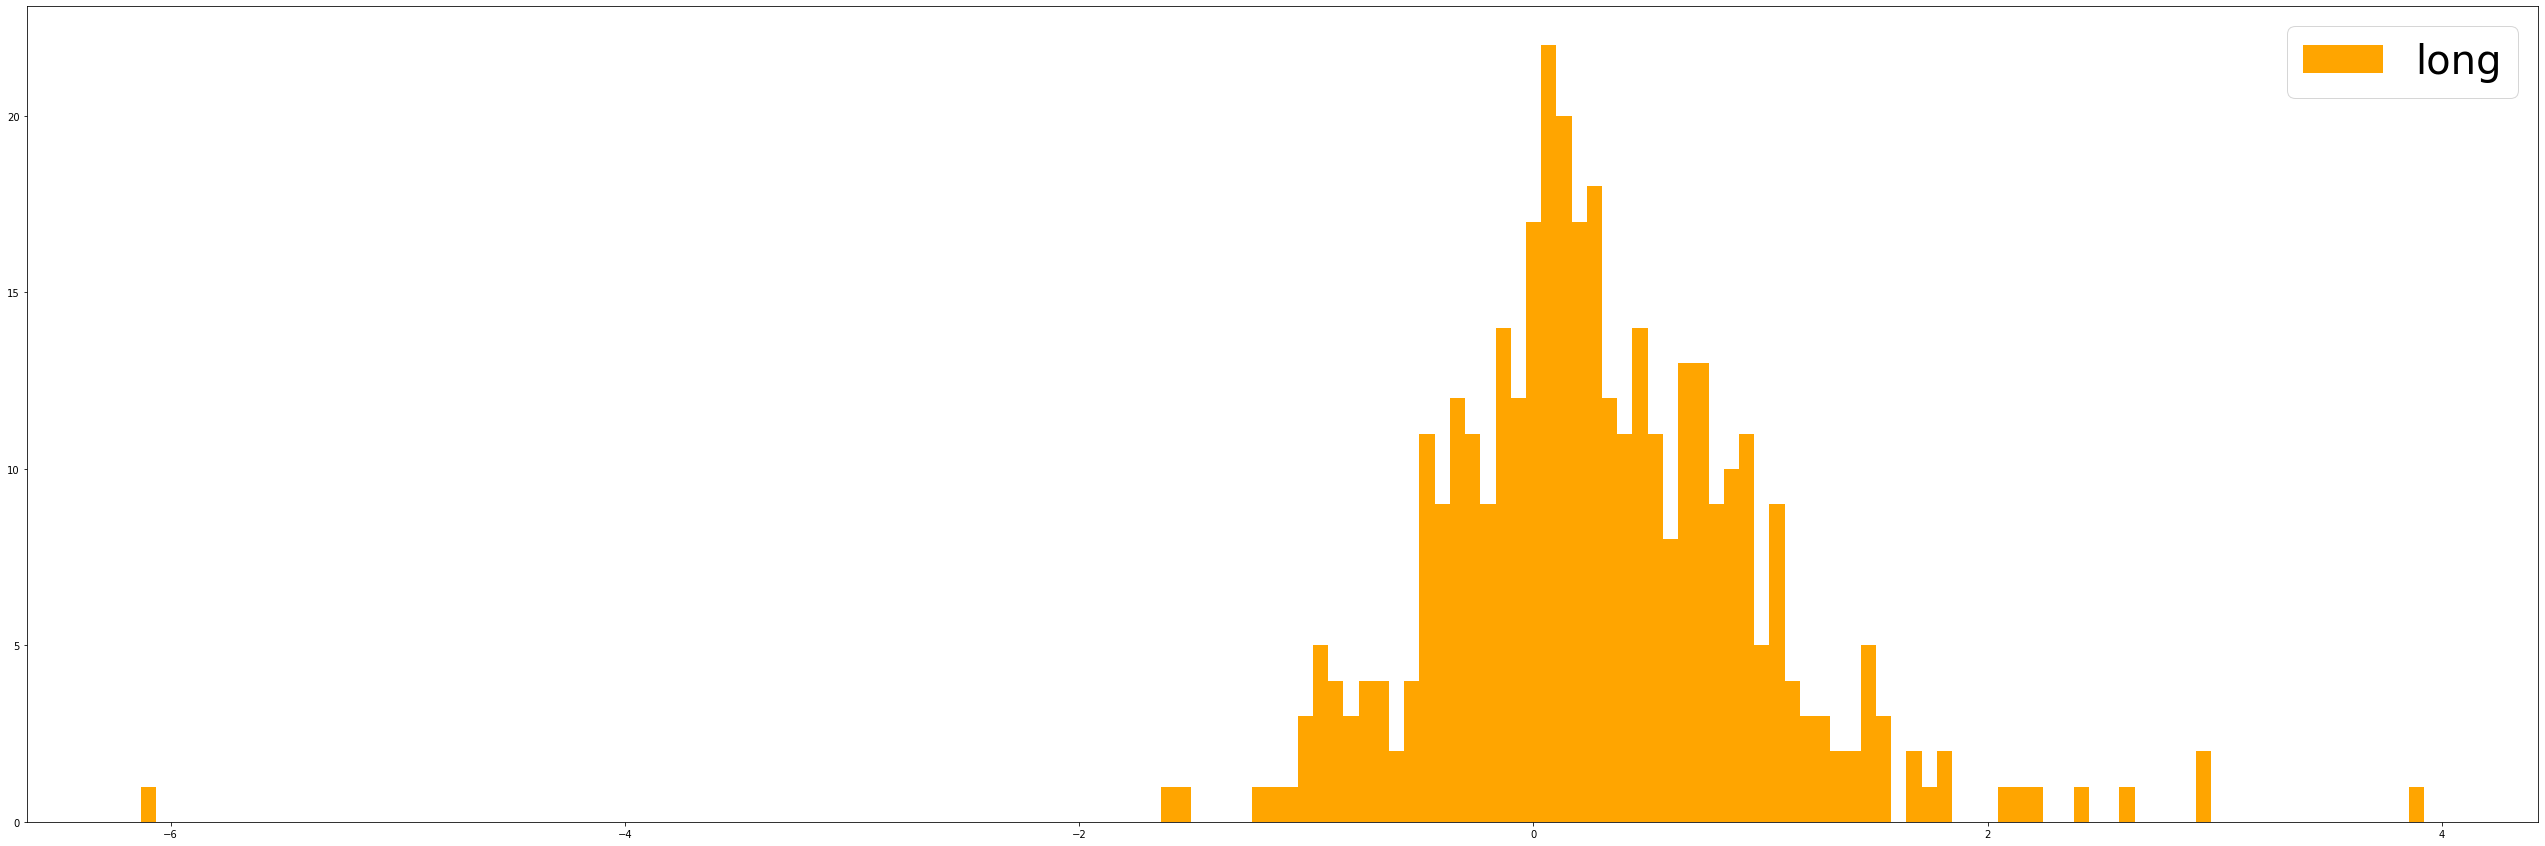

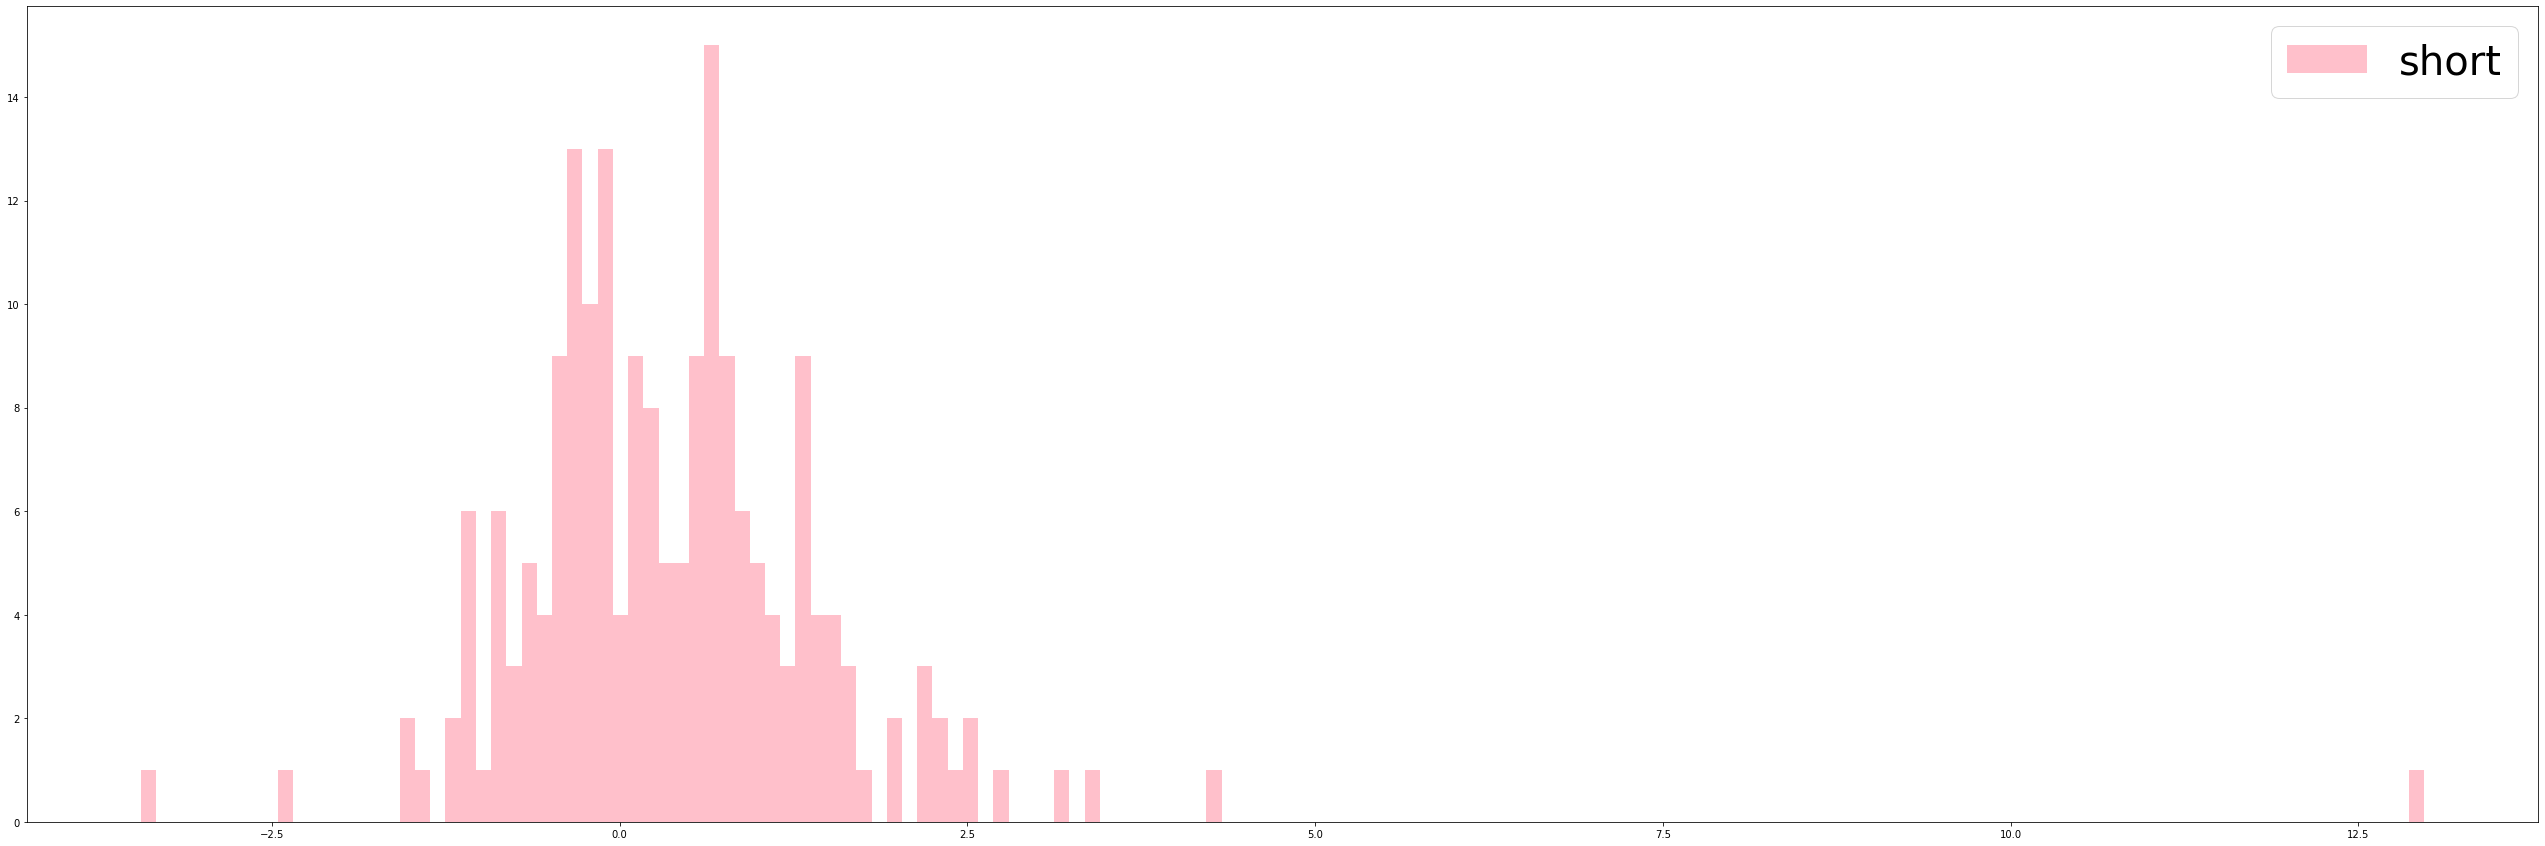

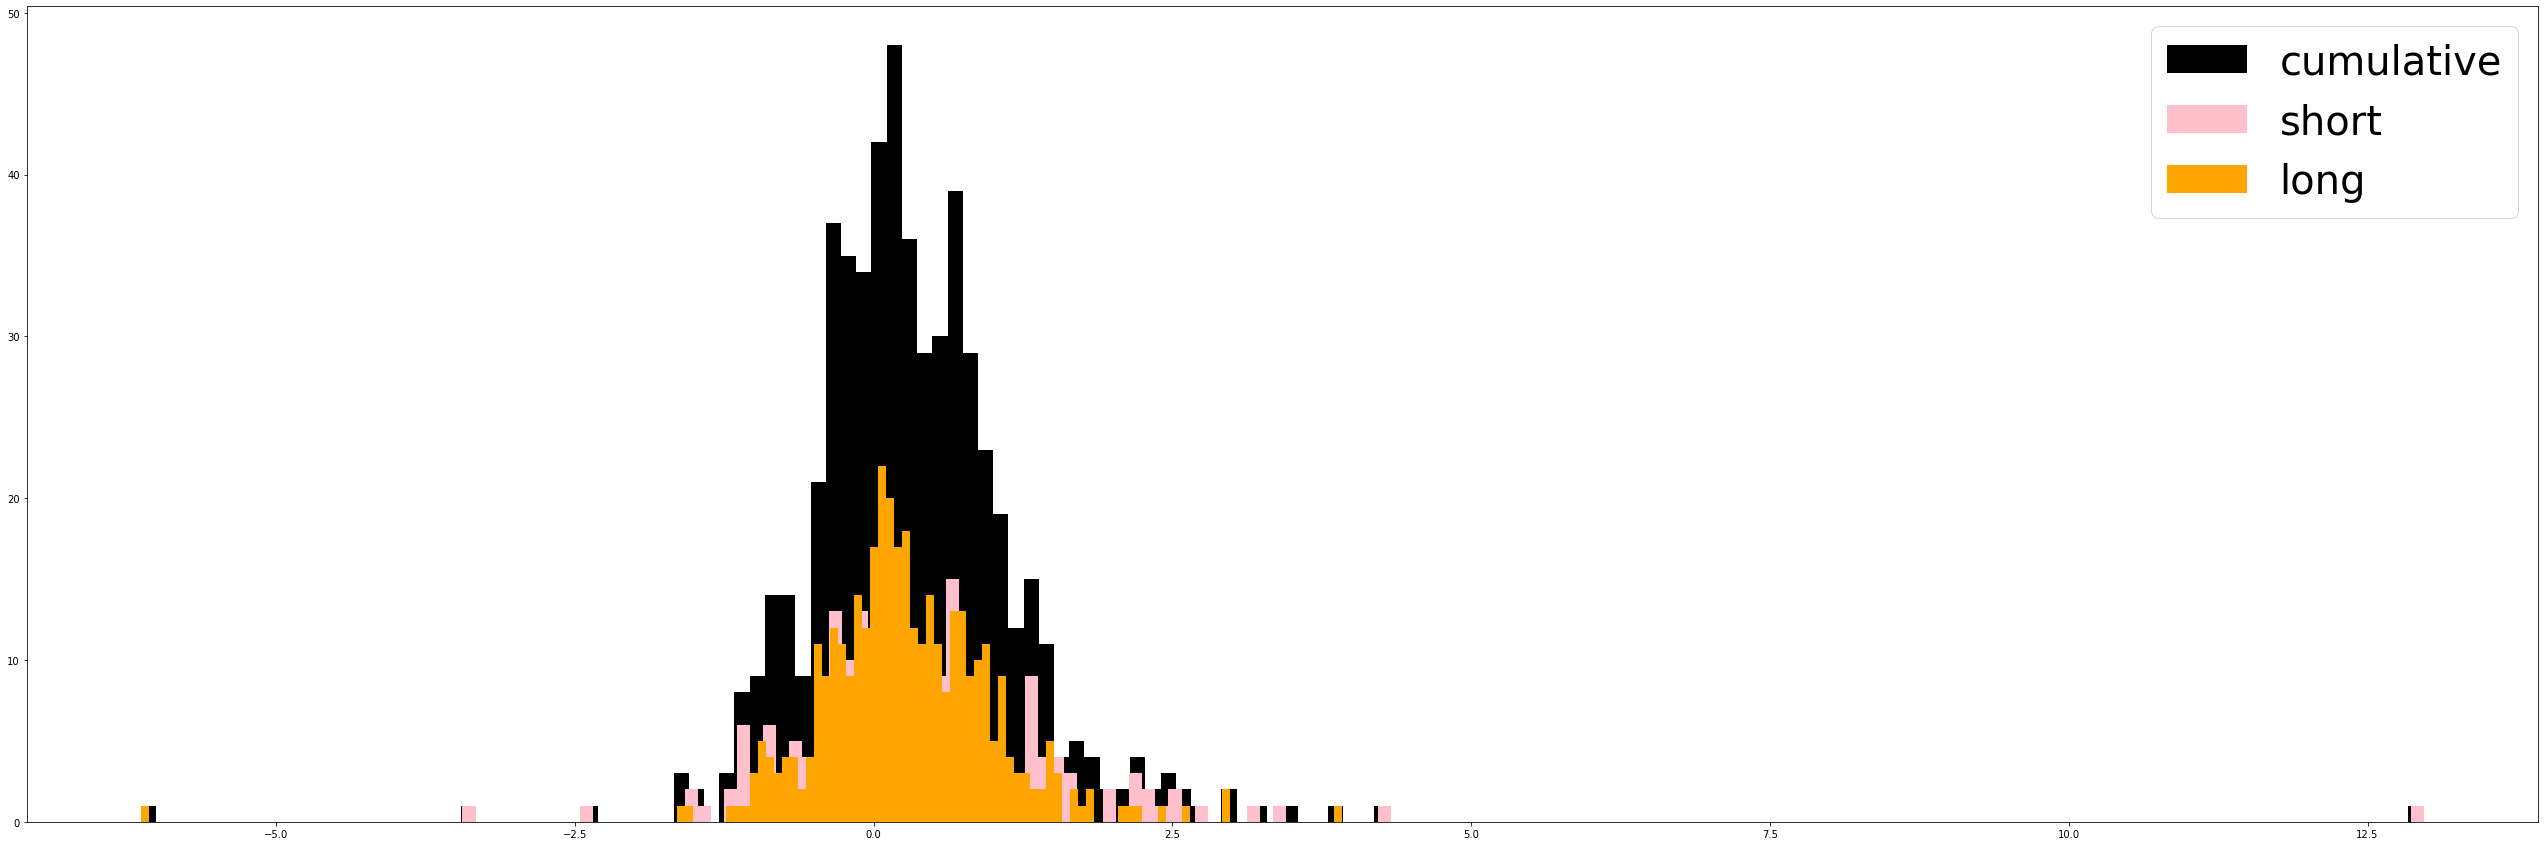

In [ ]:
# Cumulative
plt.figure(figsize=(45,15))

plt.hist(trade_pnl[trade_pnl['pnl'] != 0]['pnl'],color='black',bins=150)

plt.legend(['cumulative'],fontsize=40)

plt.show()

# Short
plt.figure(figsize=(45,15))

plt.hist(trade_pnl[trade_pnl['positionType'] == 'long']['pnl'],color='orange',bins=150)

plt.legend(['long'],fontsize=40)

plt.show()

# Long
plt.figure(figsize=(45,15))

plt.hist(trade_pnl[trade_pnl['positionType'] == 'short']['pnl'],color='pink',bins=150)

plt.legend(['short'],fontsize=40)

plt.show()

# Compare all
plt.figure(figsize=(45,15))
plt.hist(trade_pnl[trade_pnl['pnl'] != 0]['pnl'],color='black',bins=150)

plt.hist(trade_pnl[trade_pnl['positionType'] == 'short']['pnl'],color='pink',bins=150)
plt.hist(trade_pnl[trade_pnl['positionType'] == 'long']['pnl'],color='orange',bins=150)

plt.legend(['cumulative','short','long'],fontsize=40)

plt.show()

# Pnl vs. Price

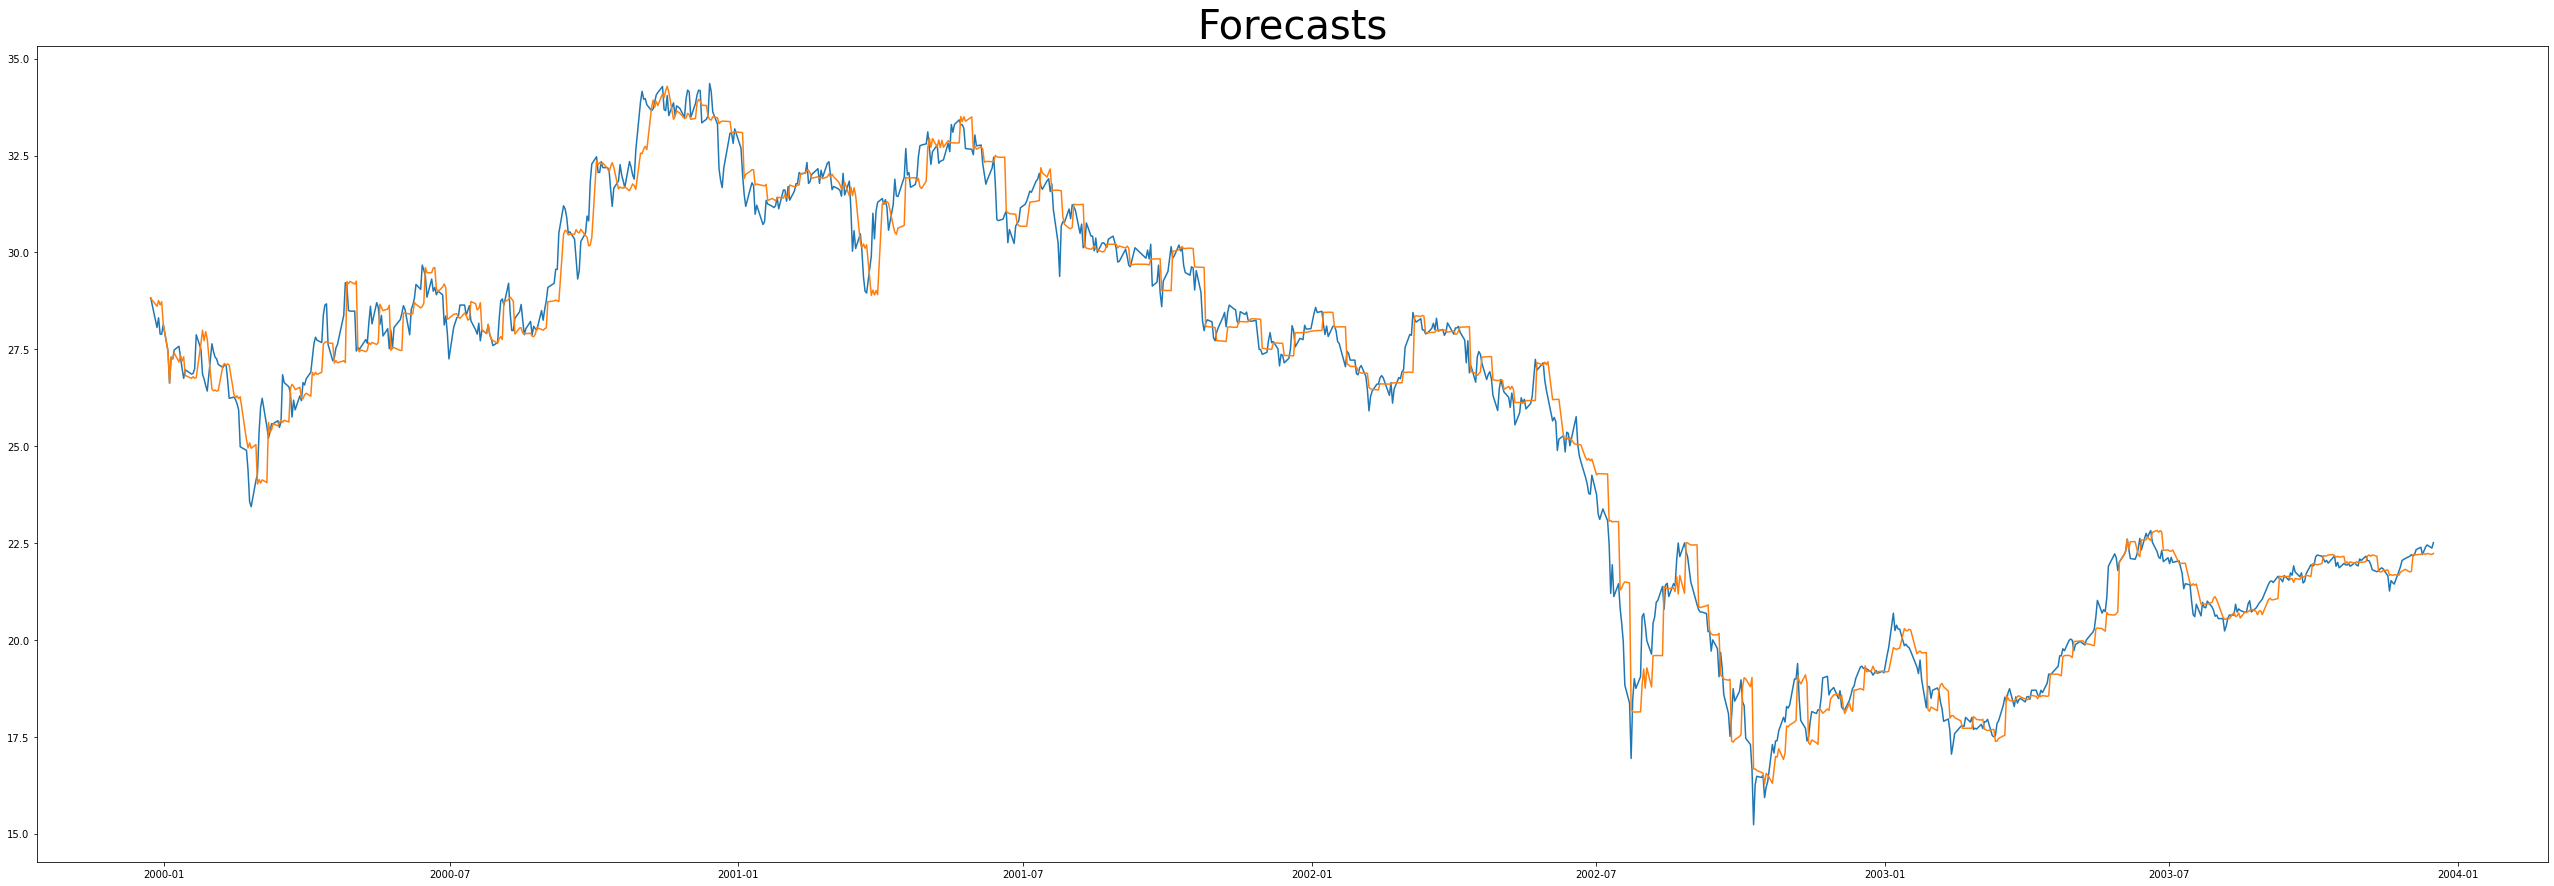

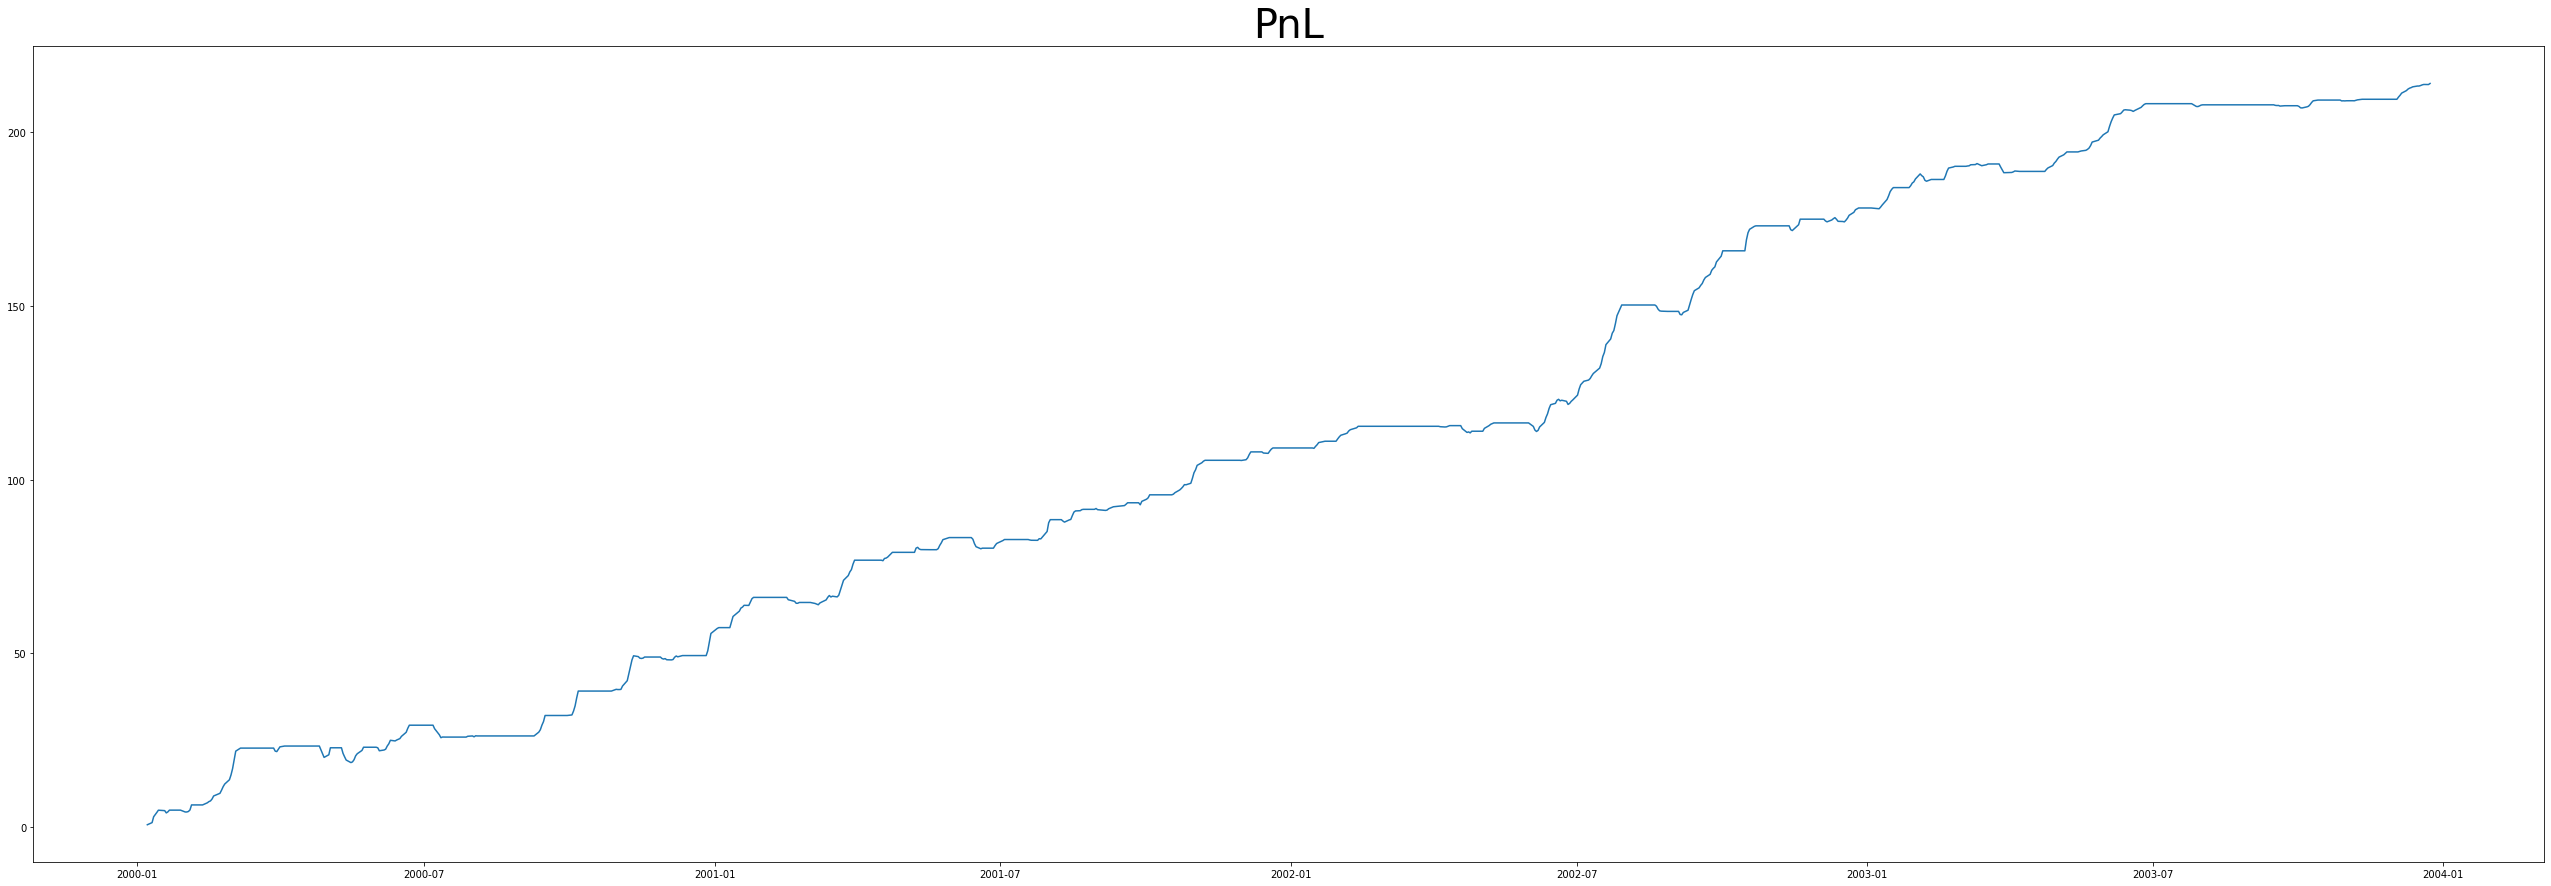

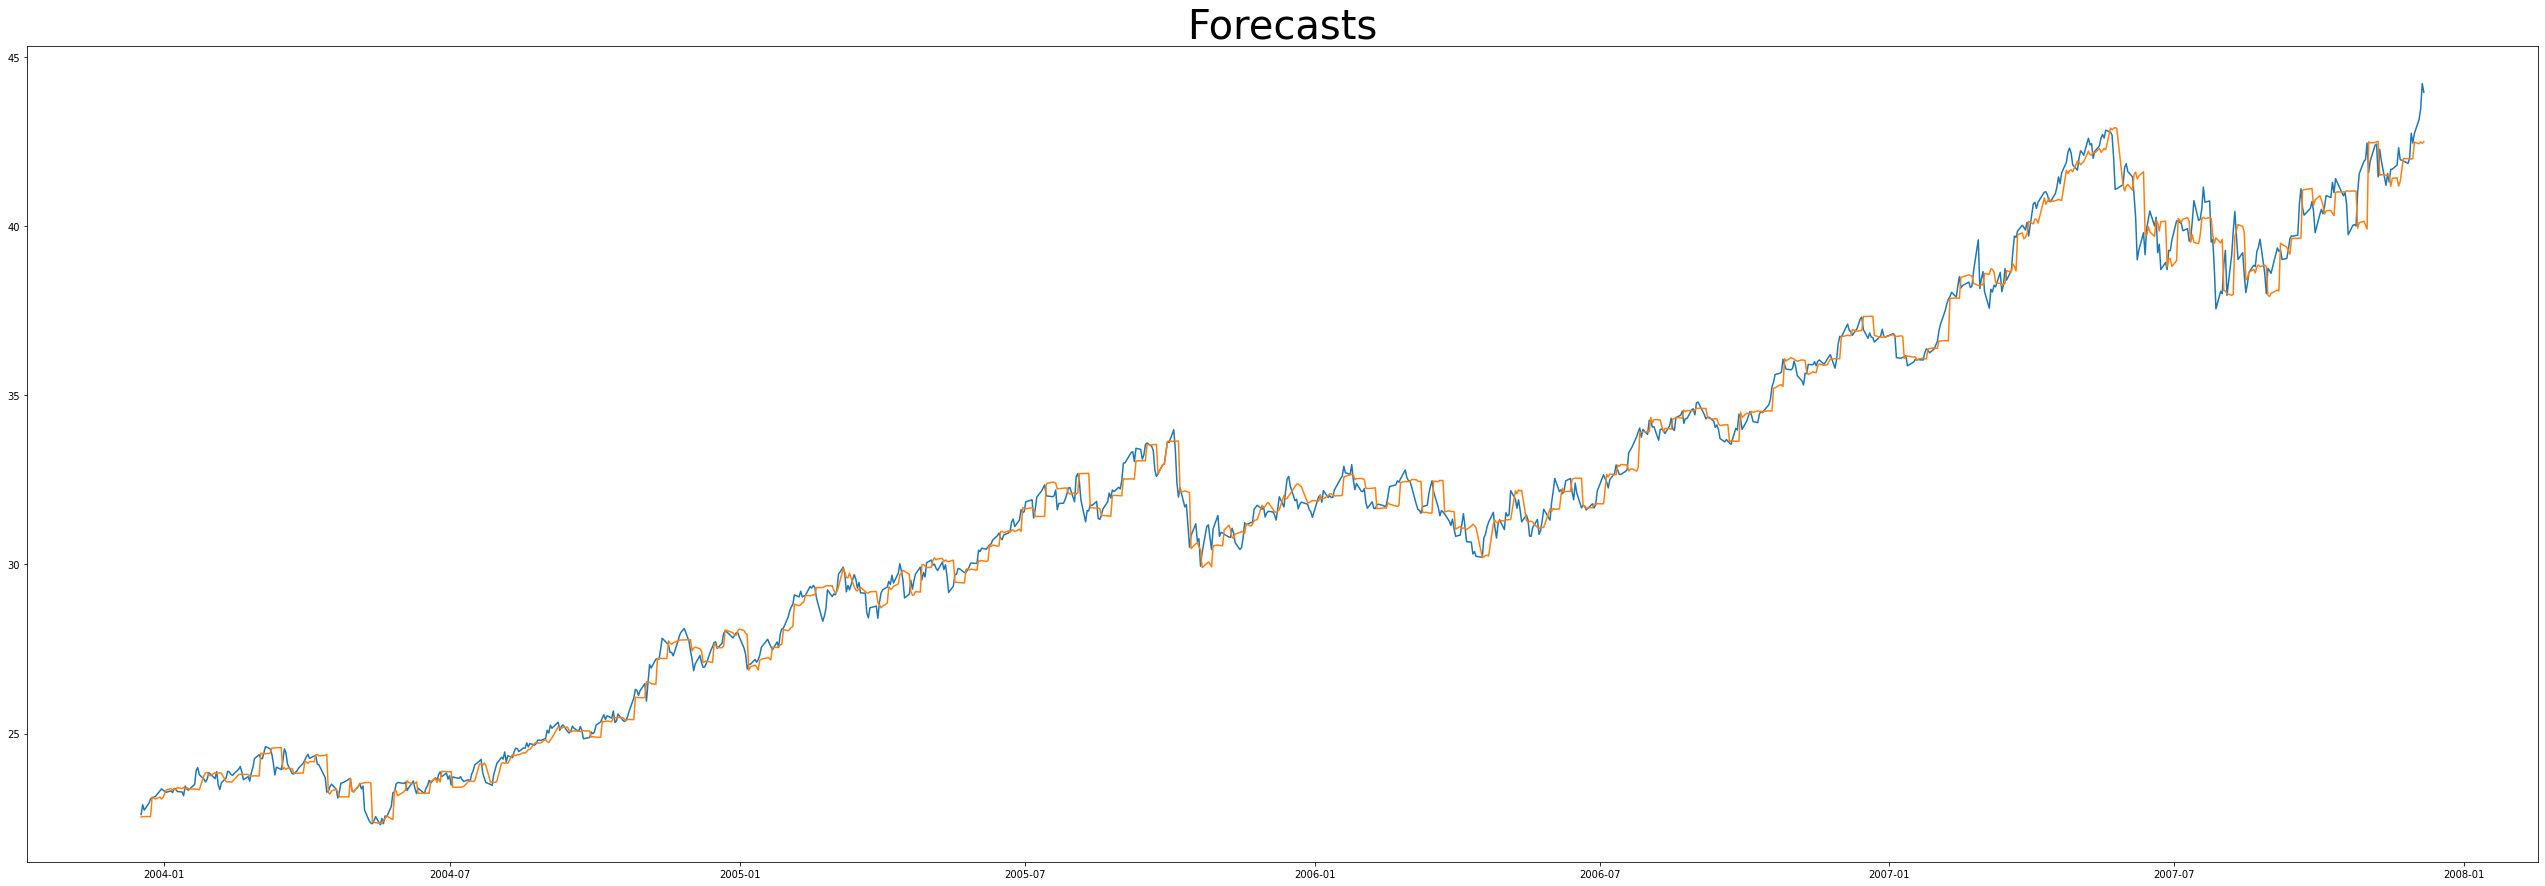

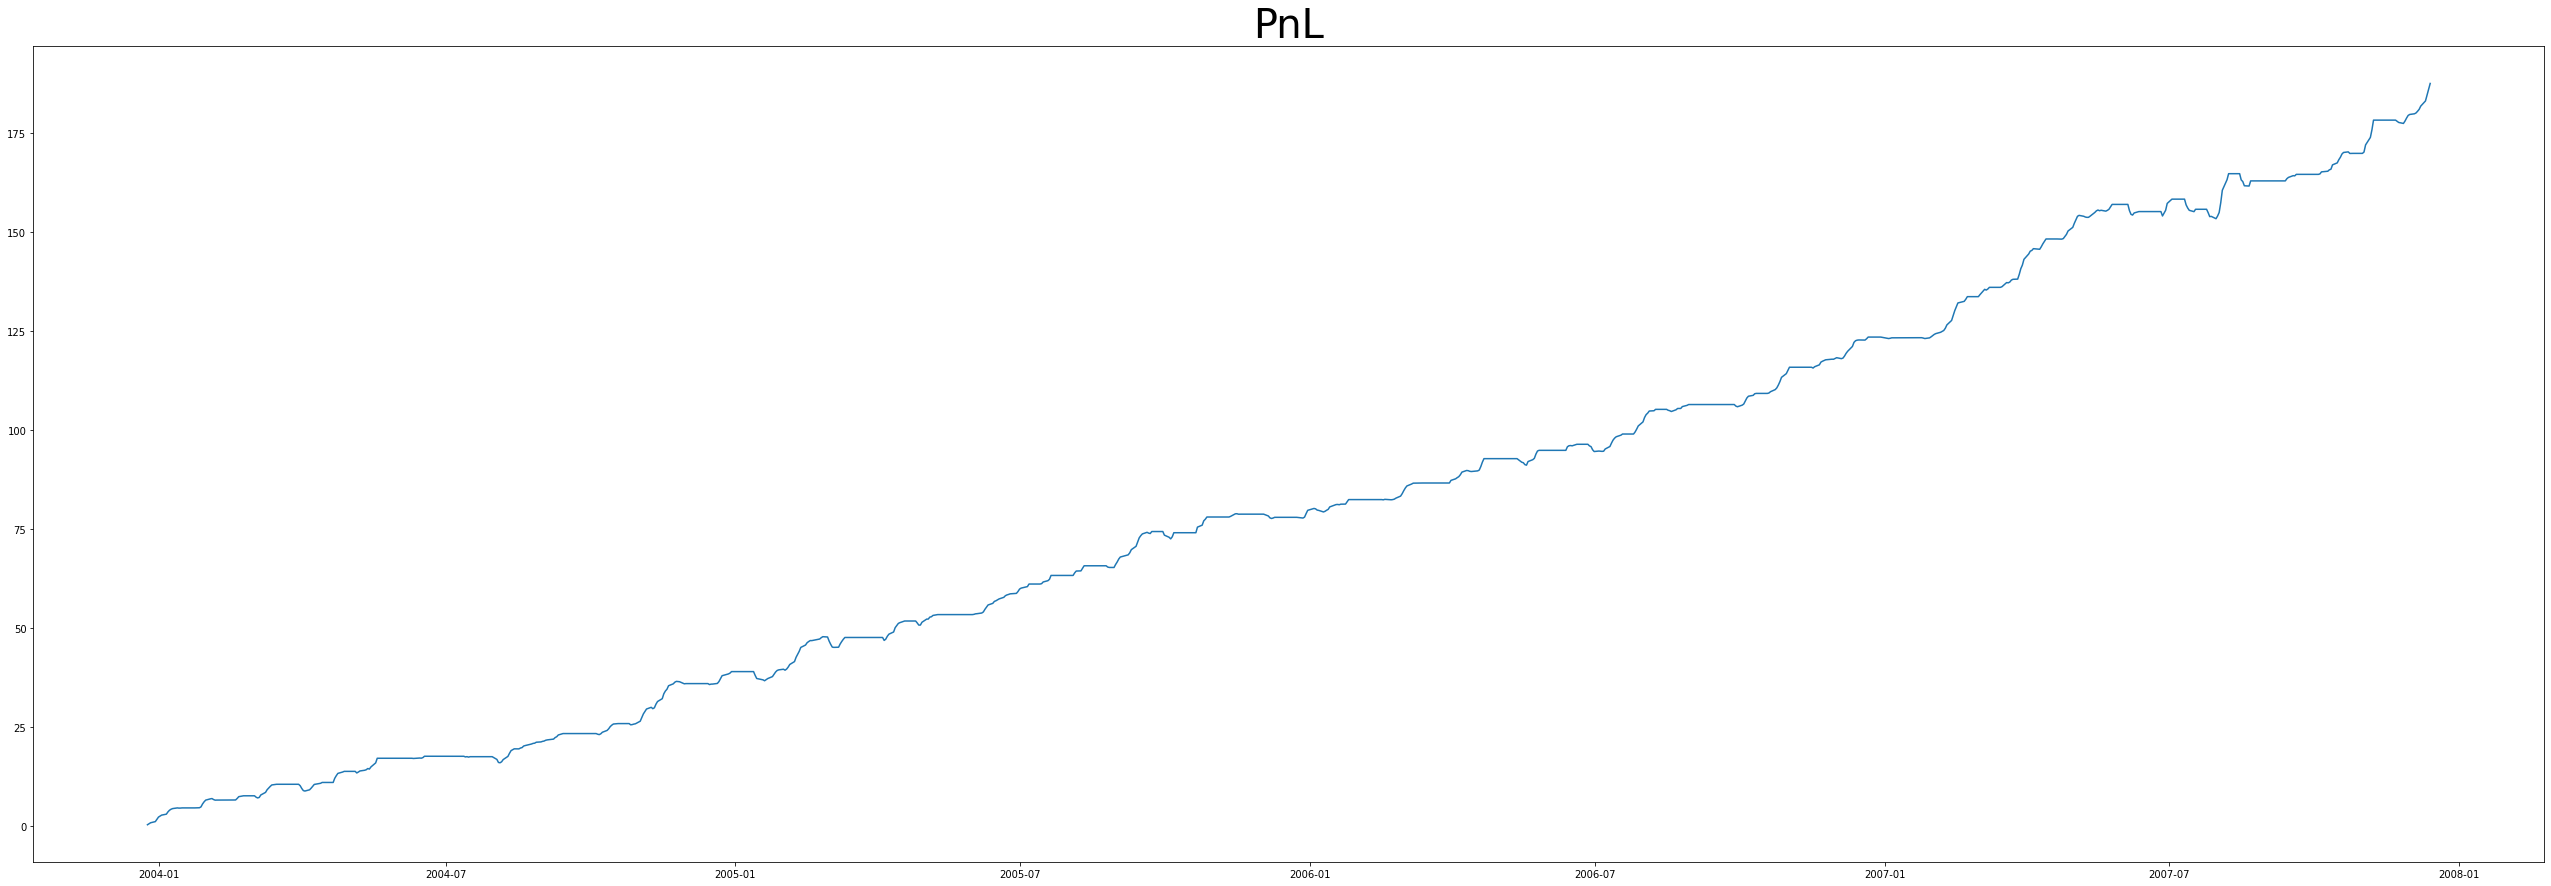

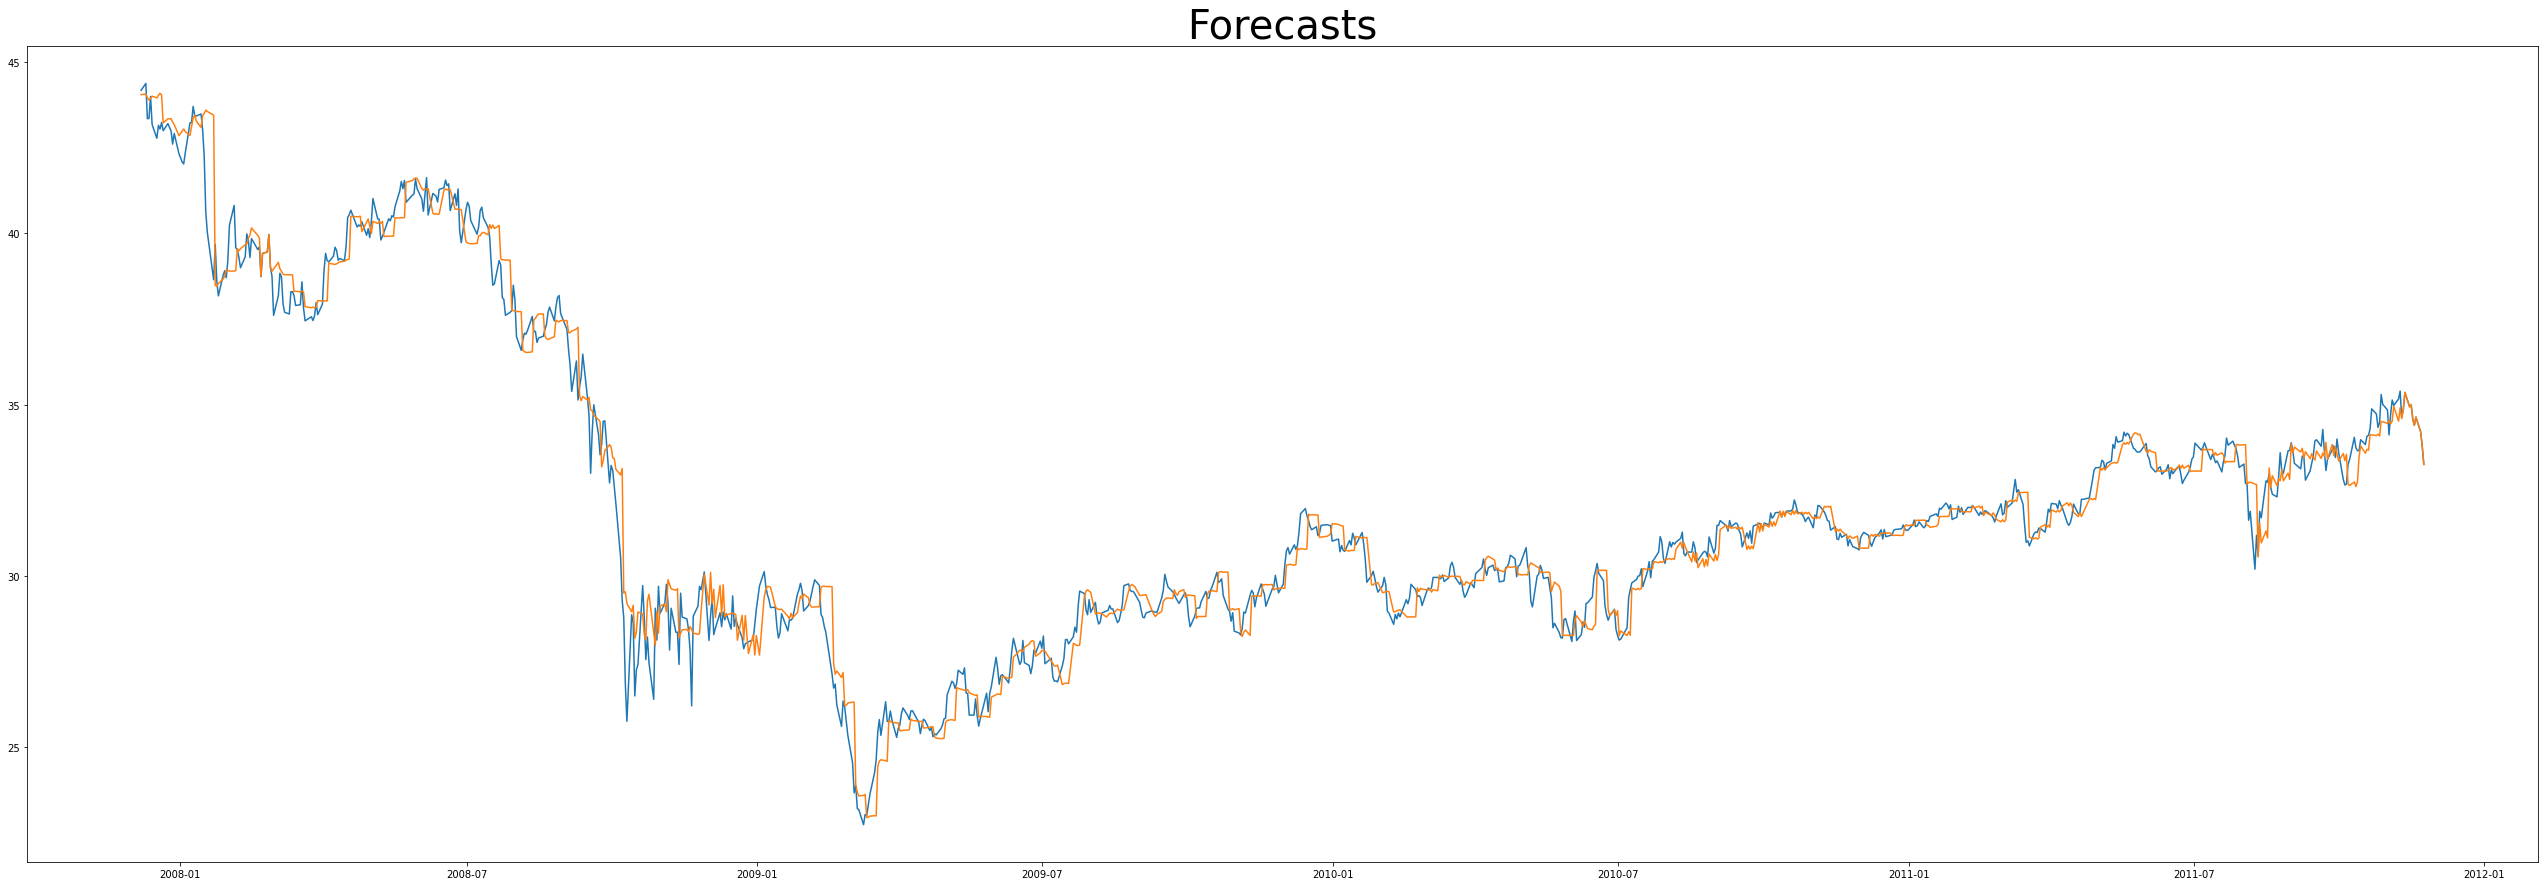

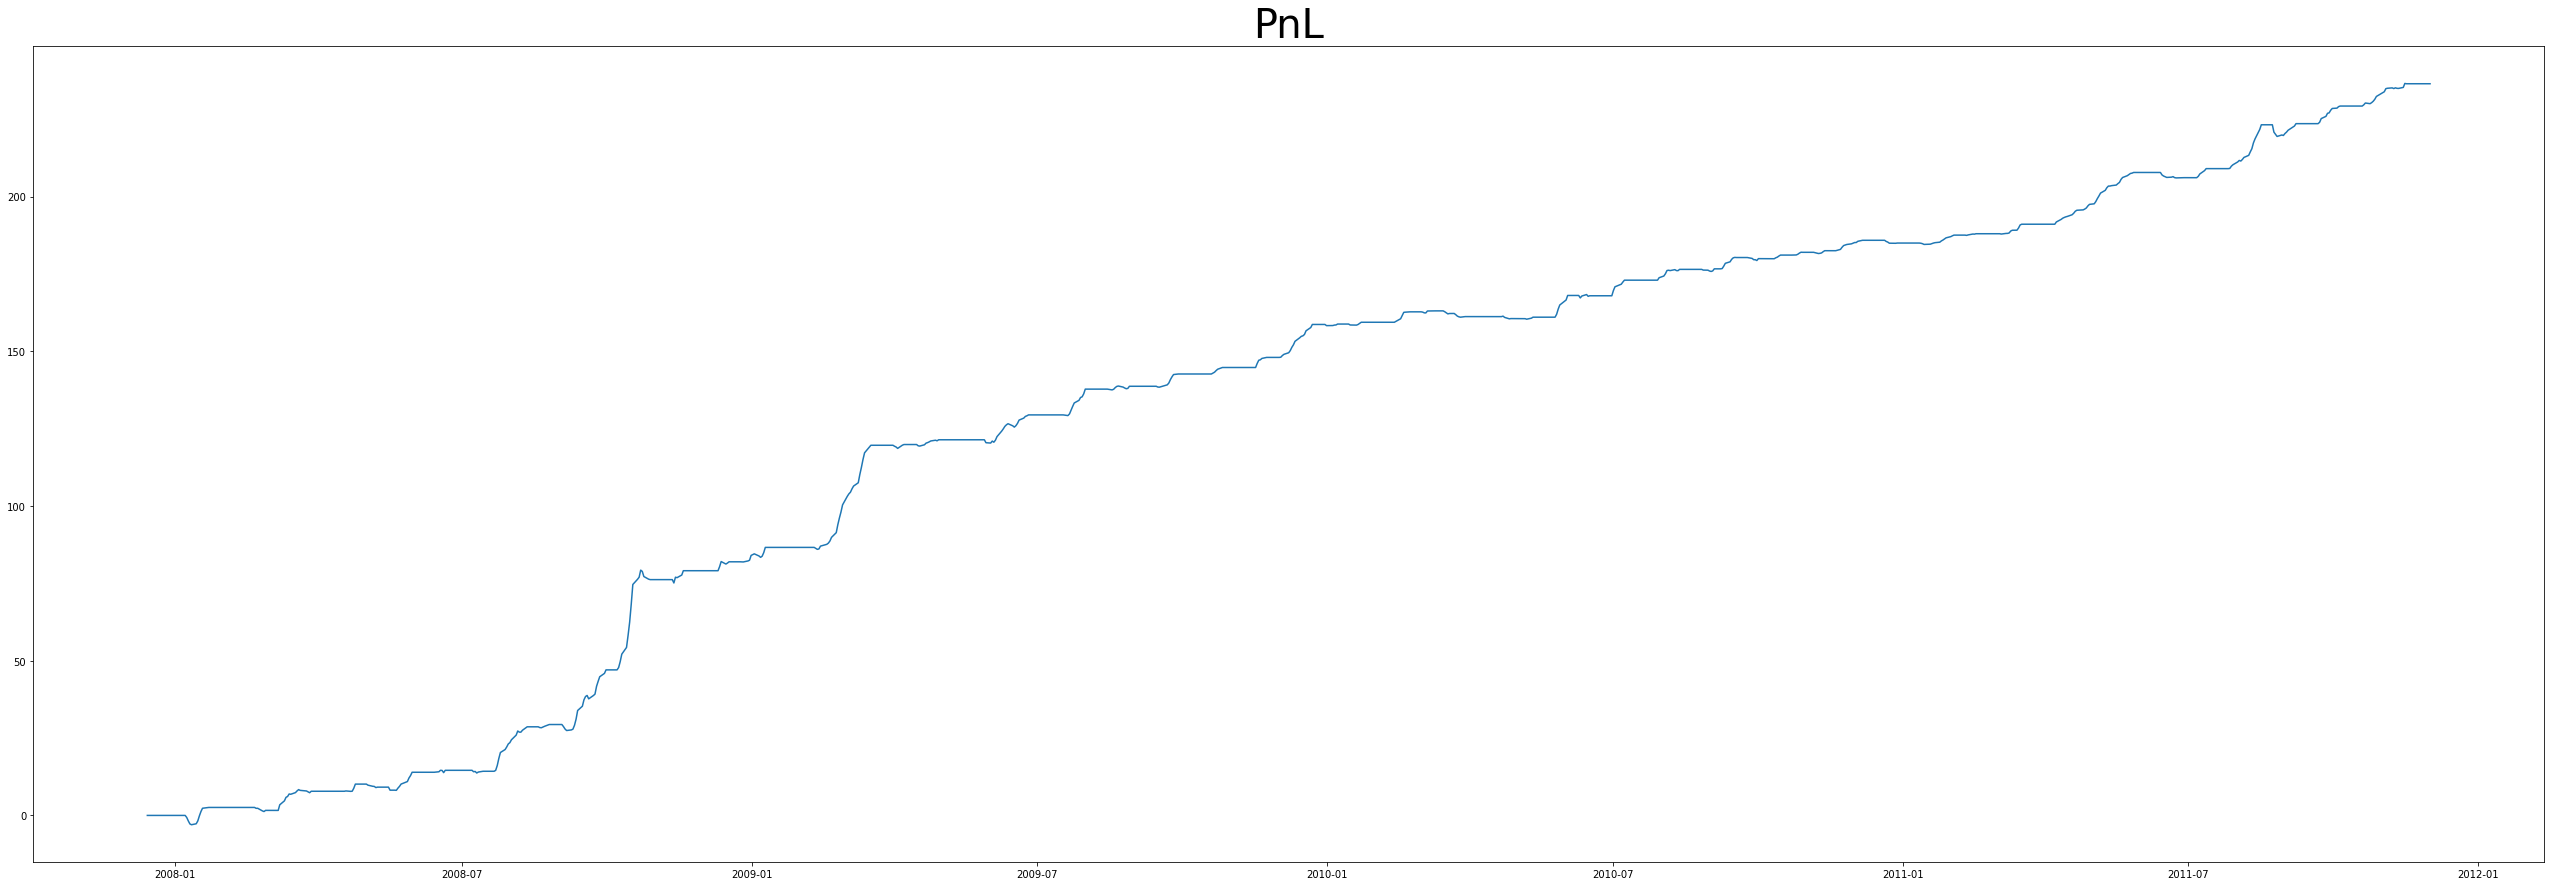

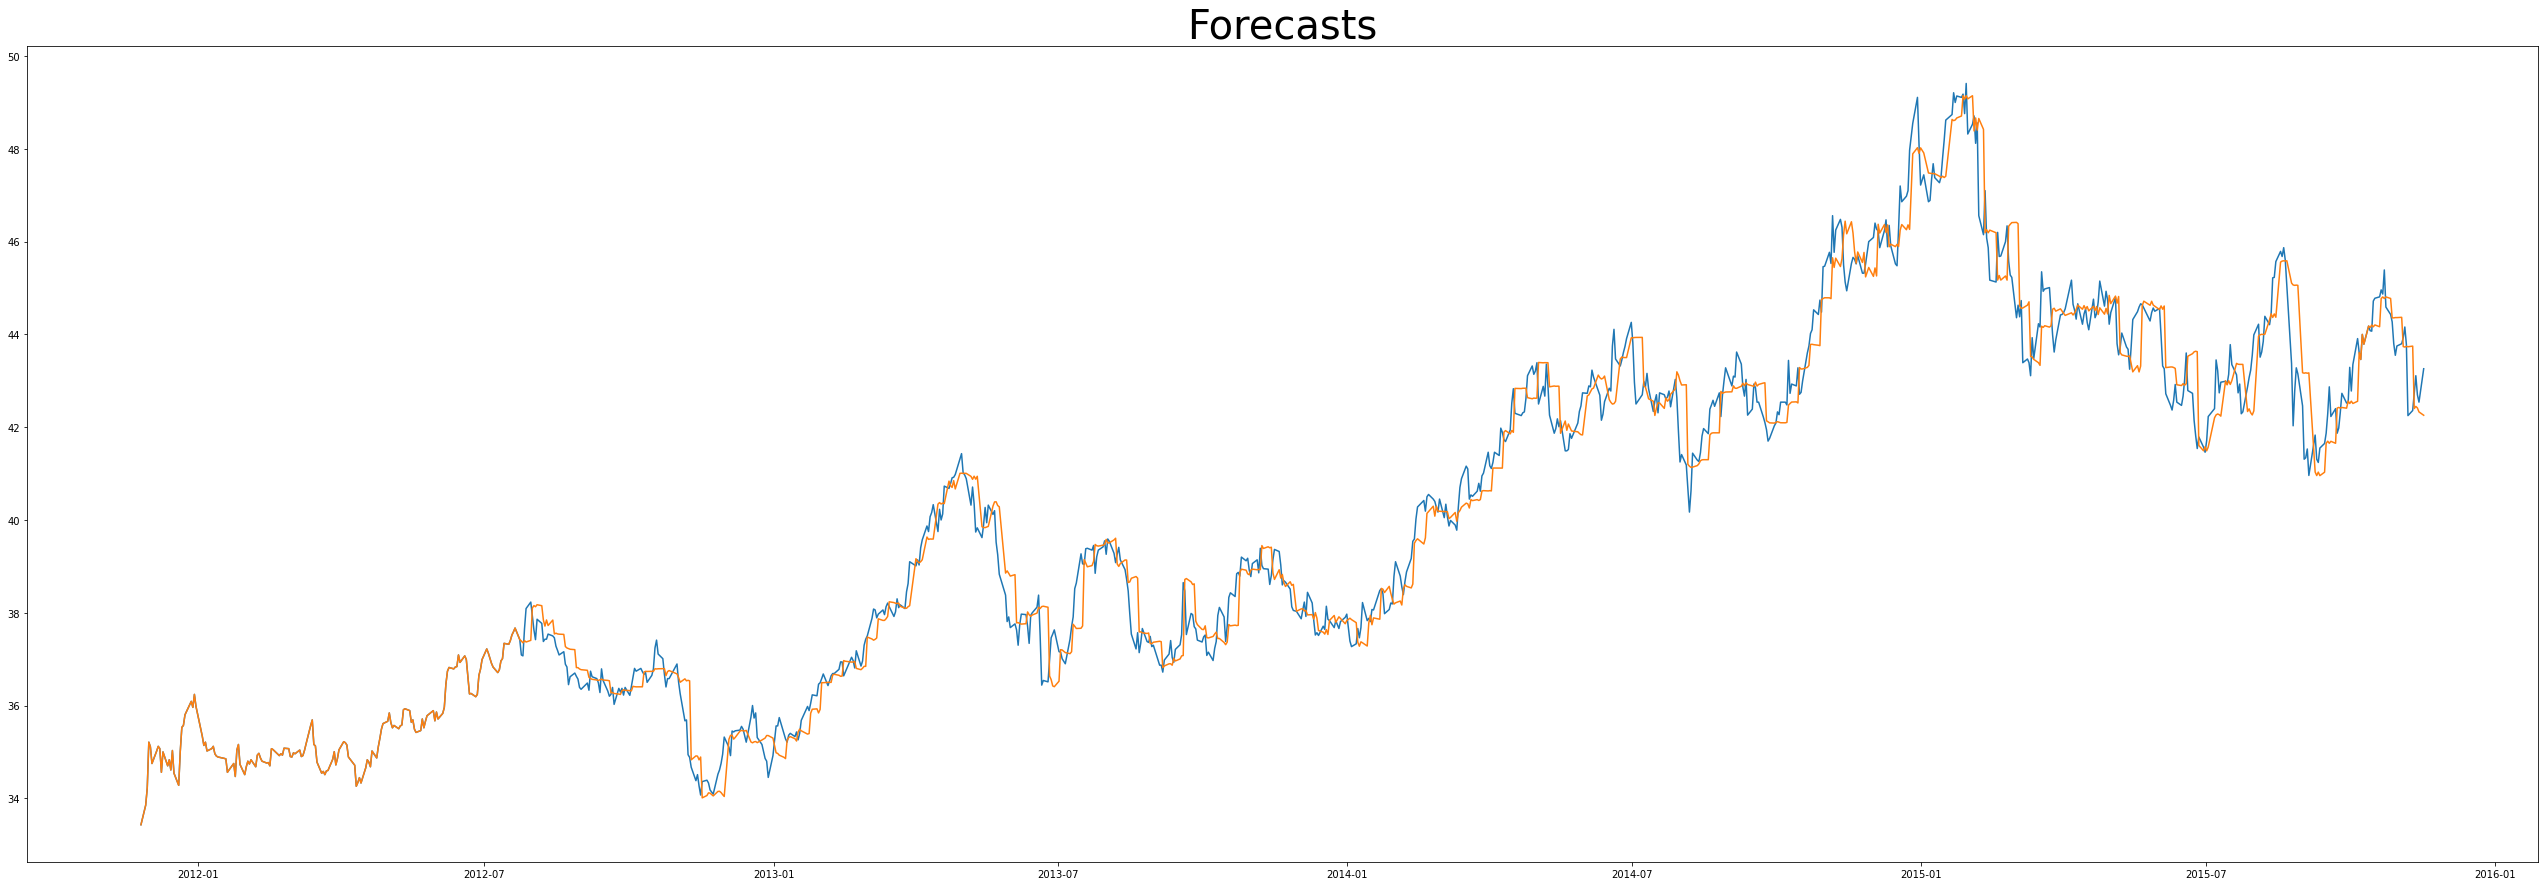

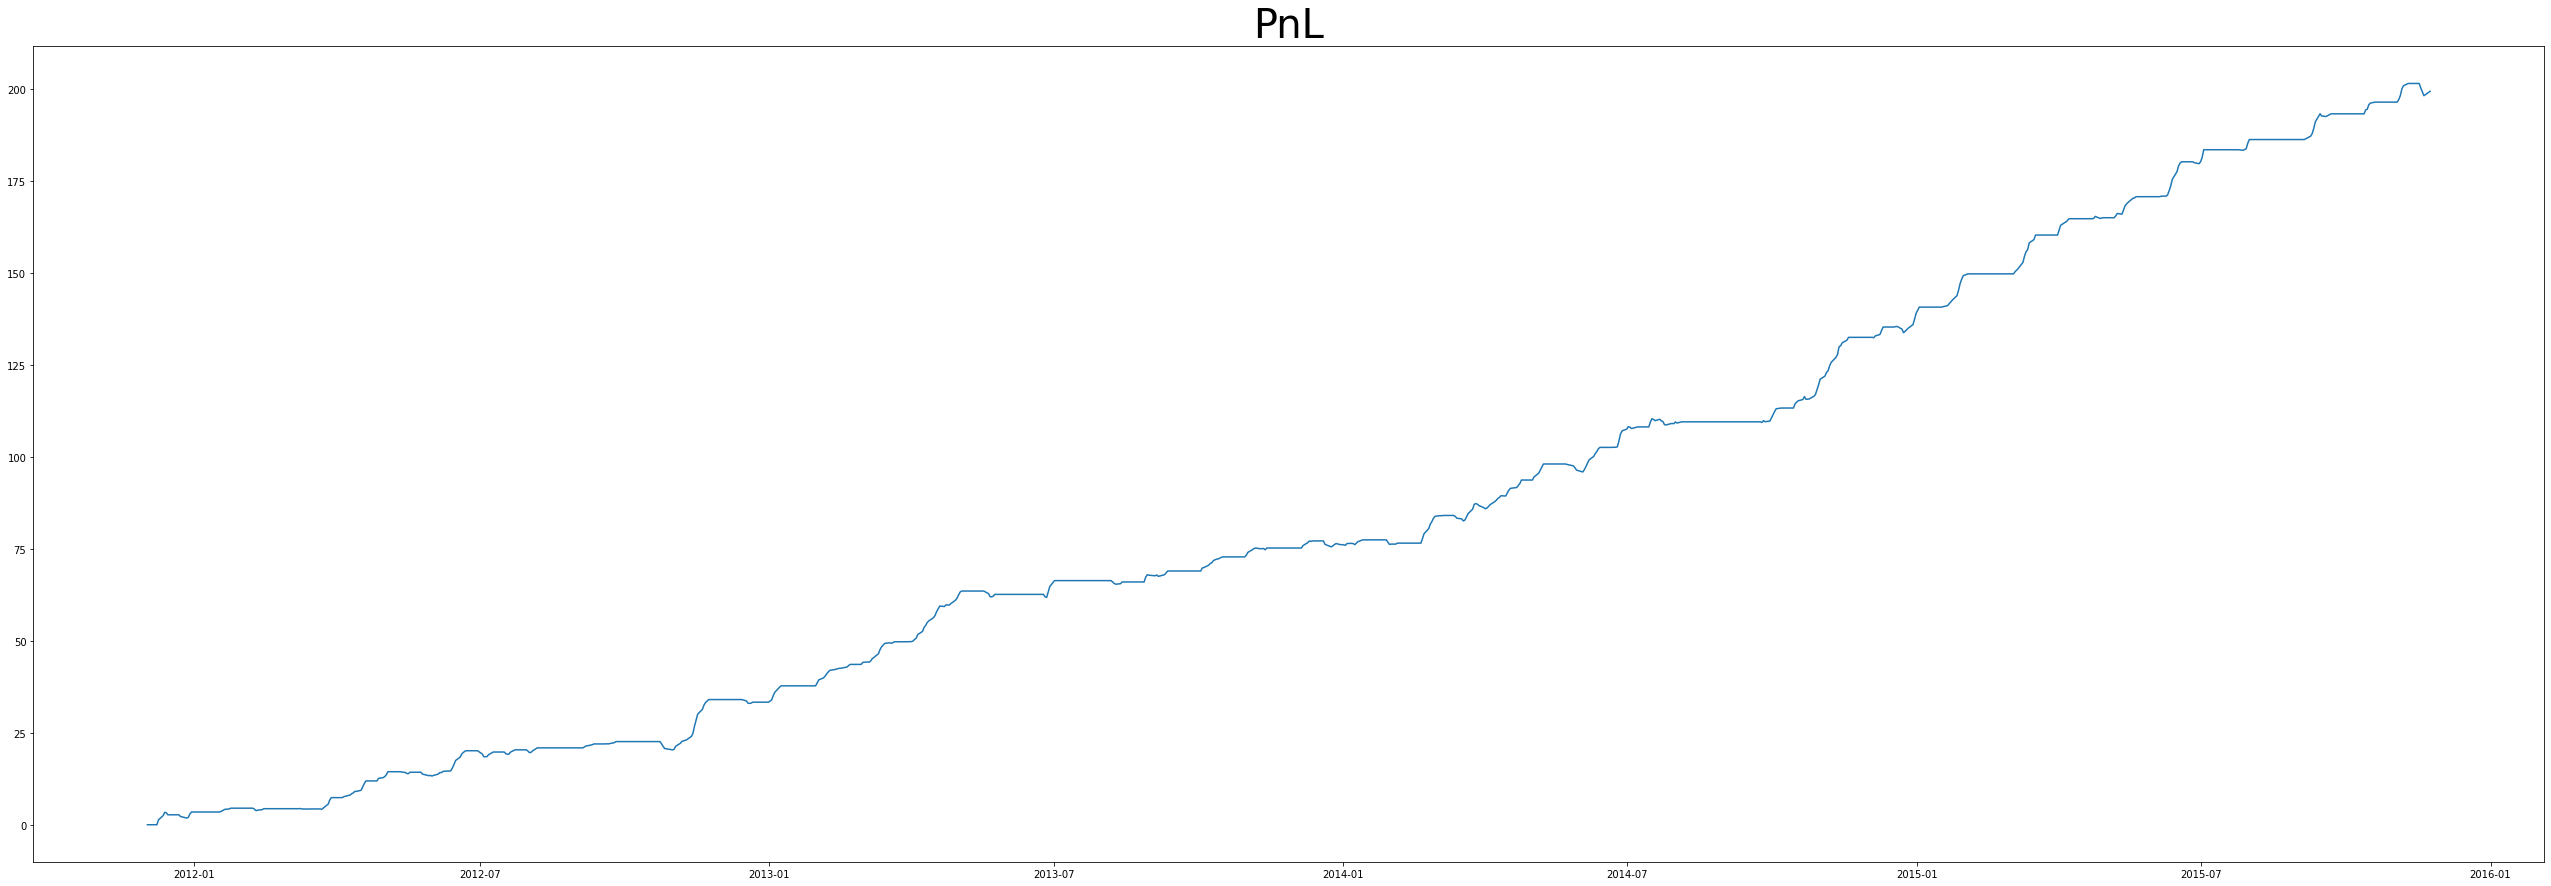

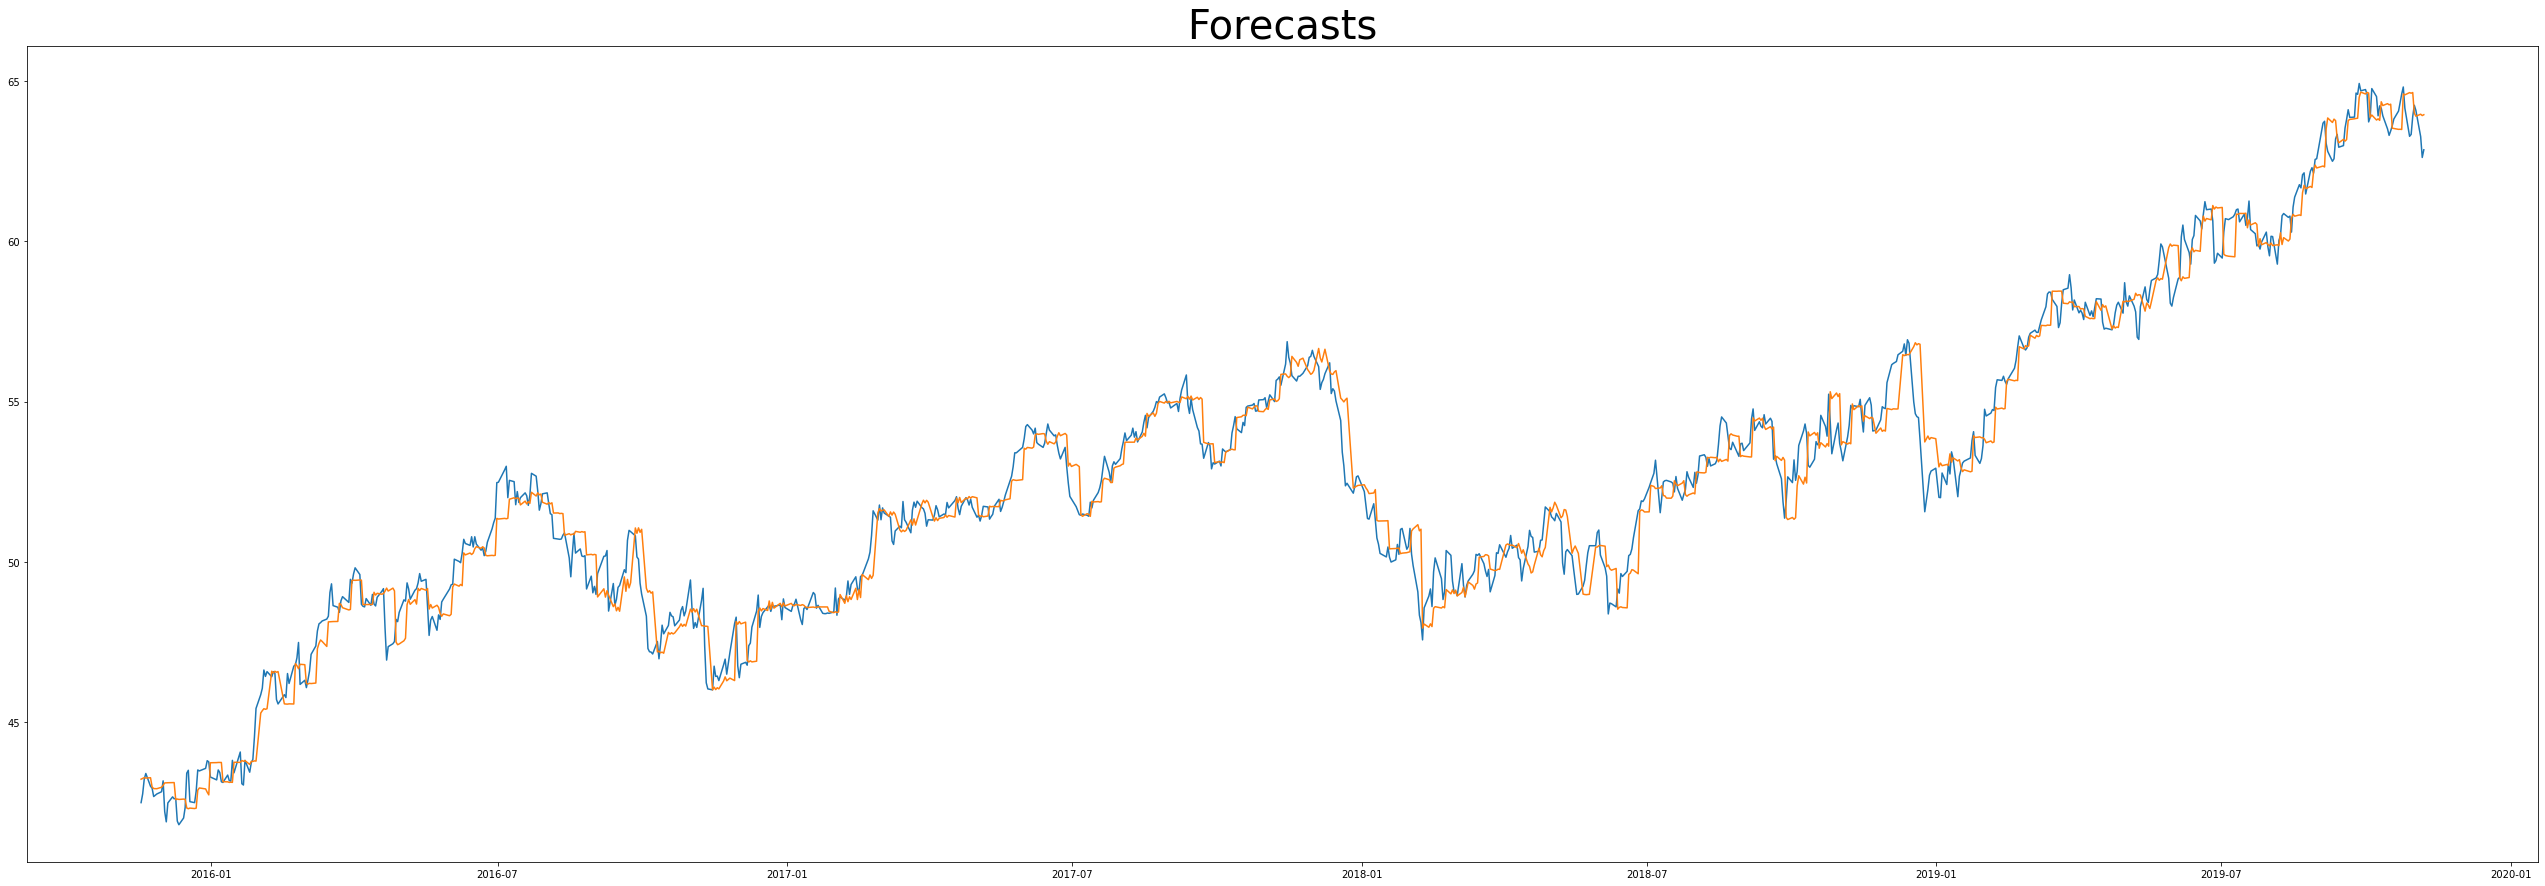

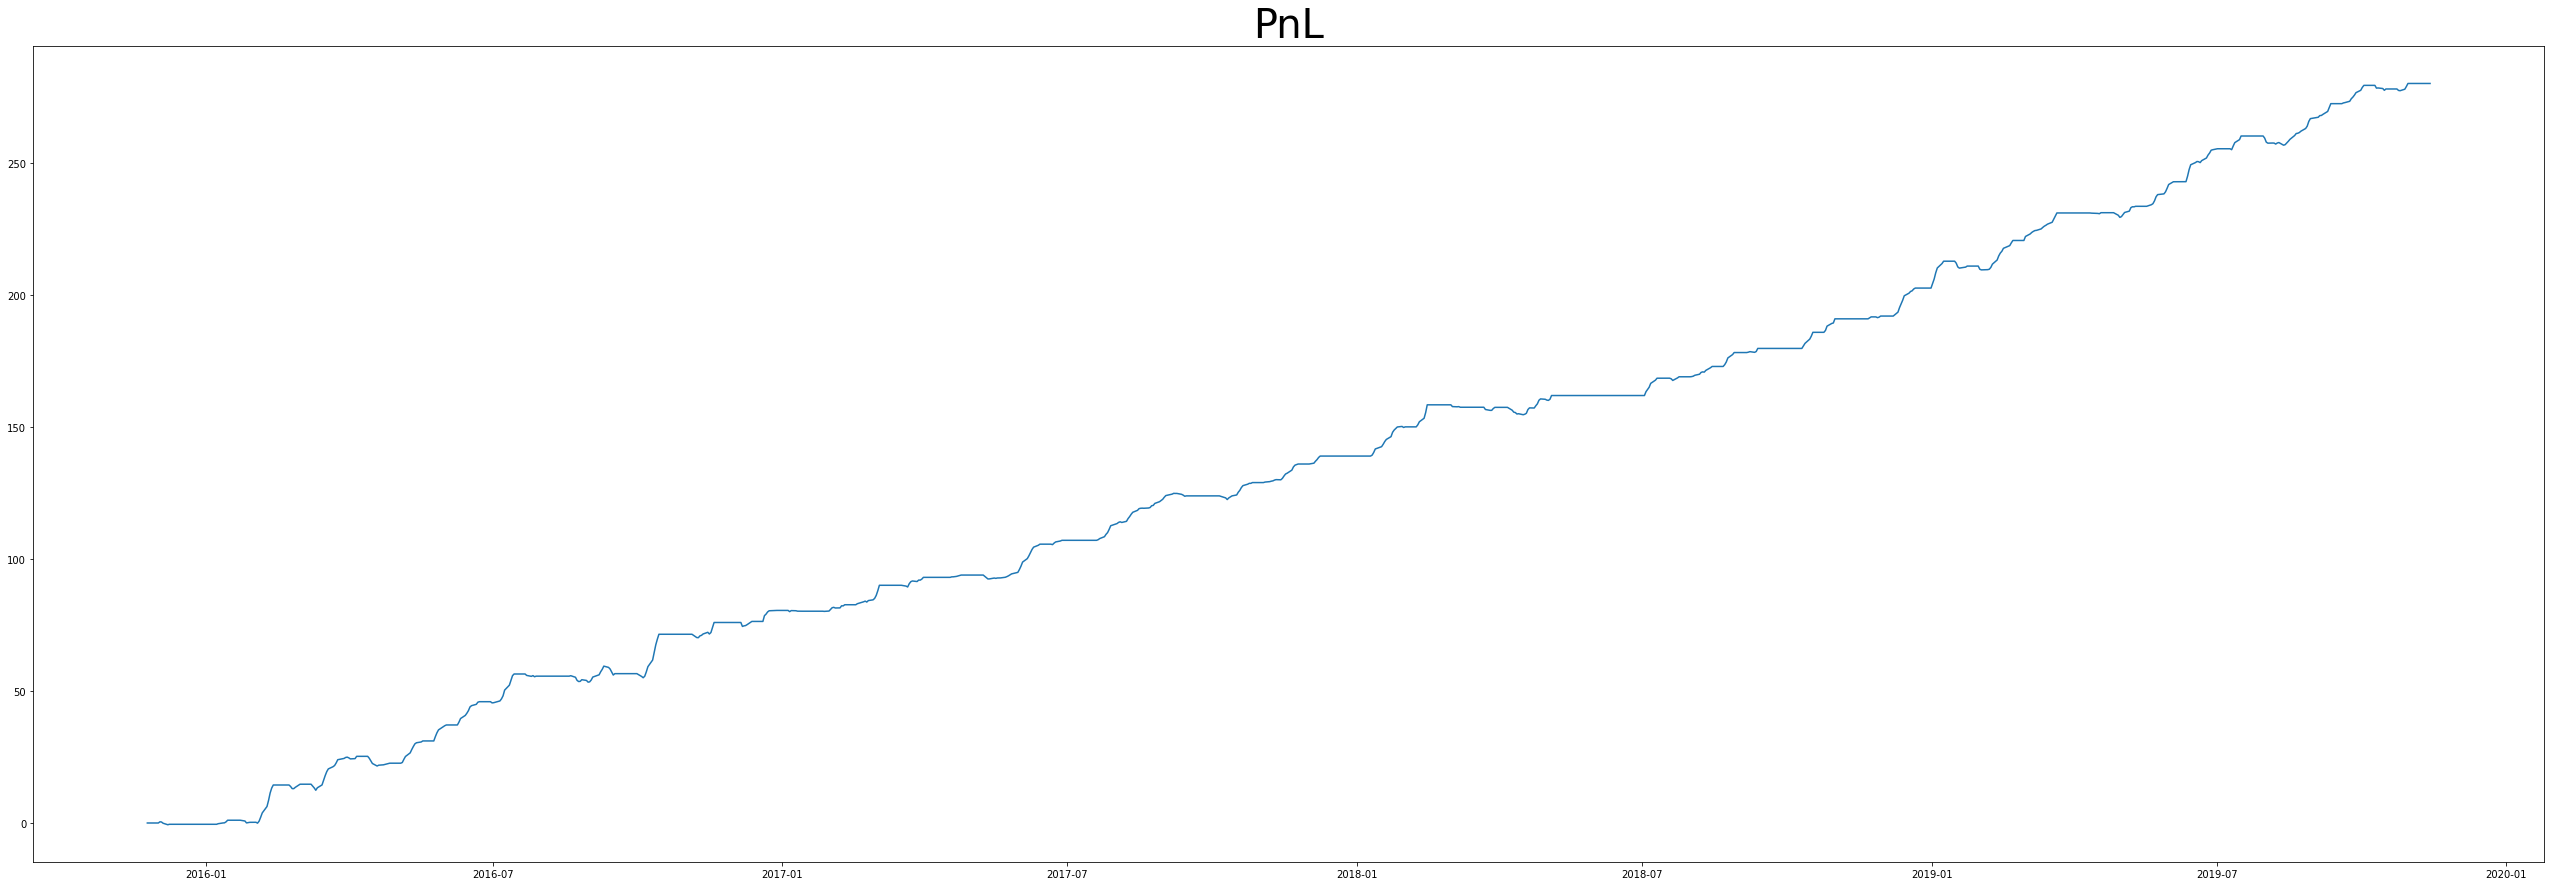

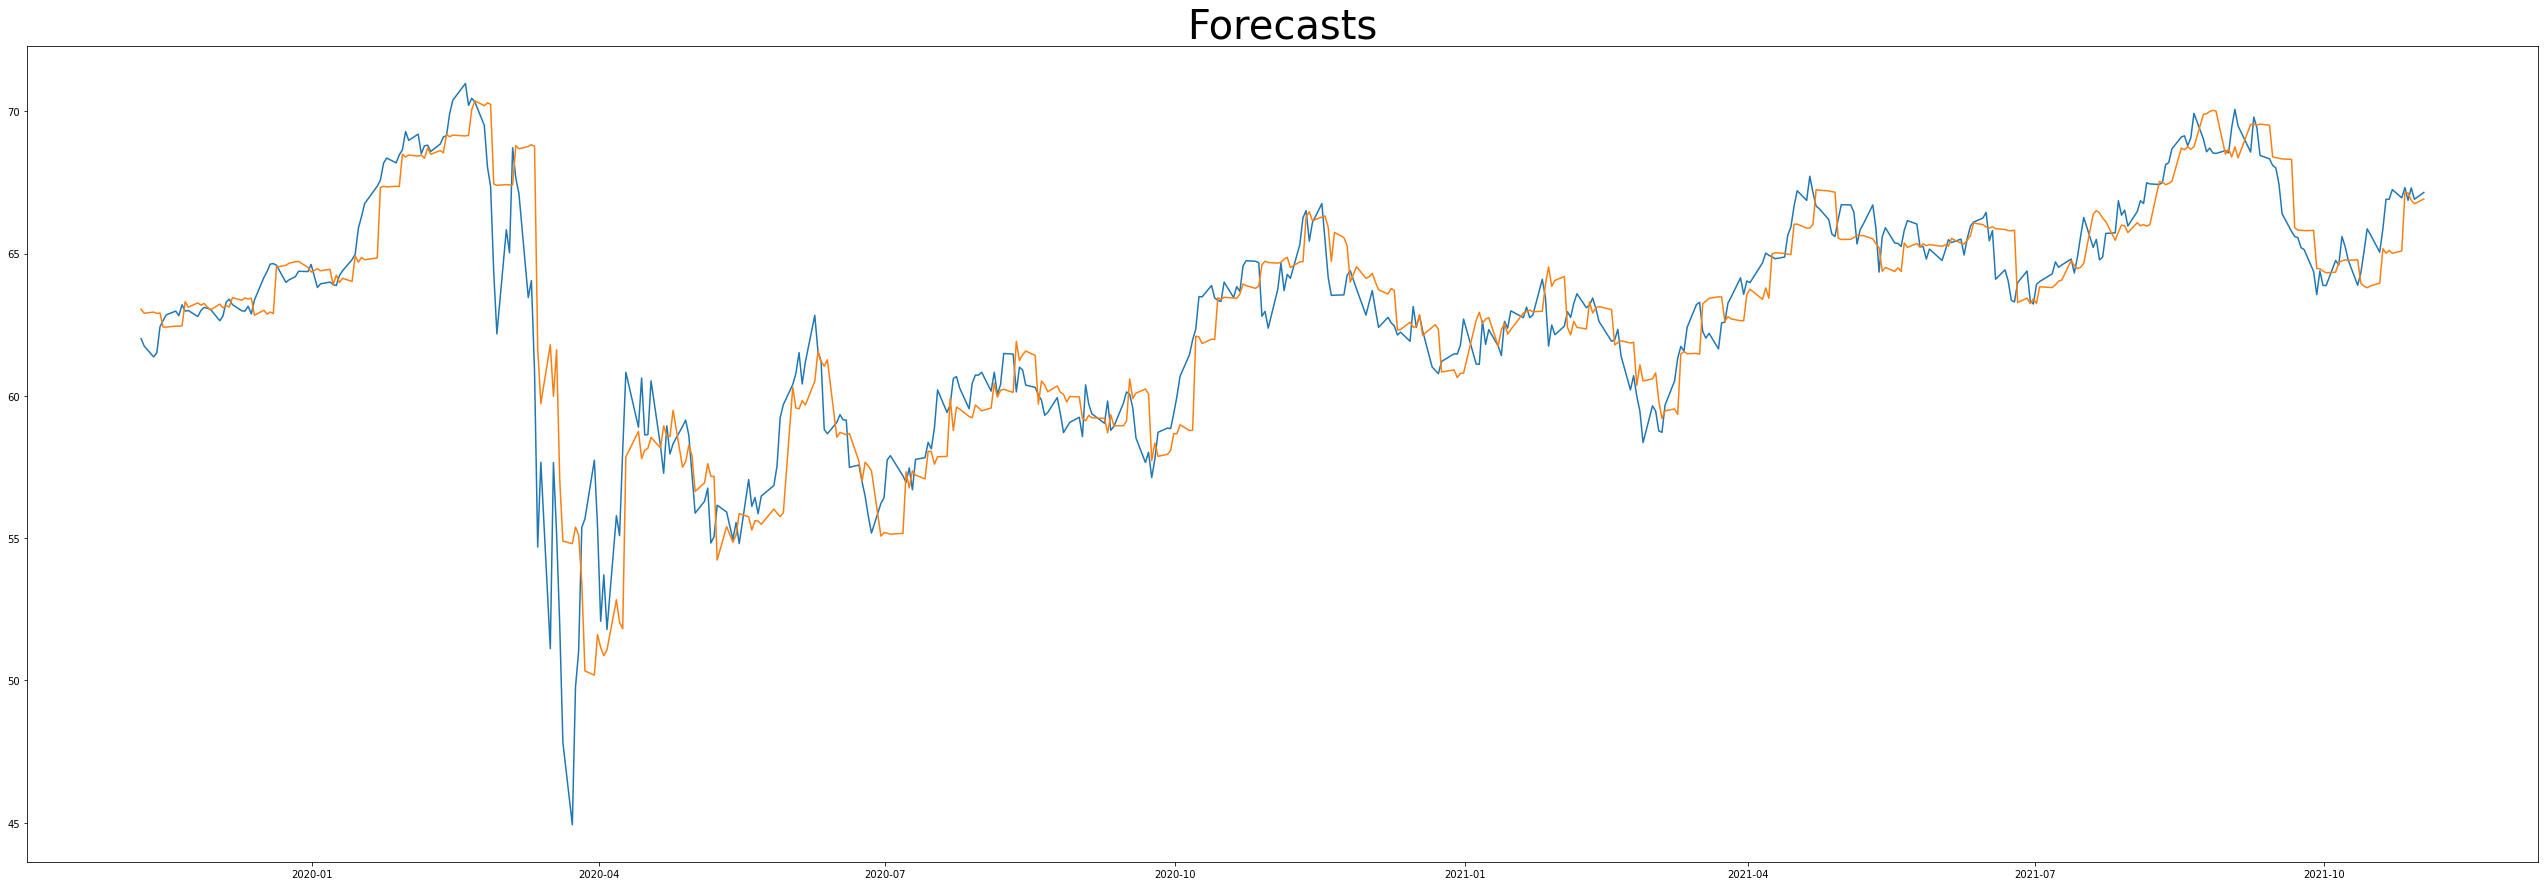

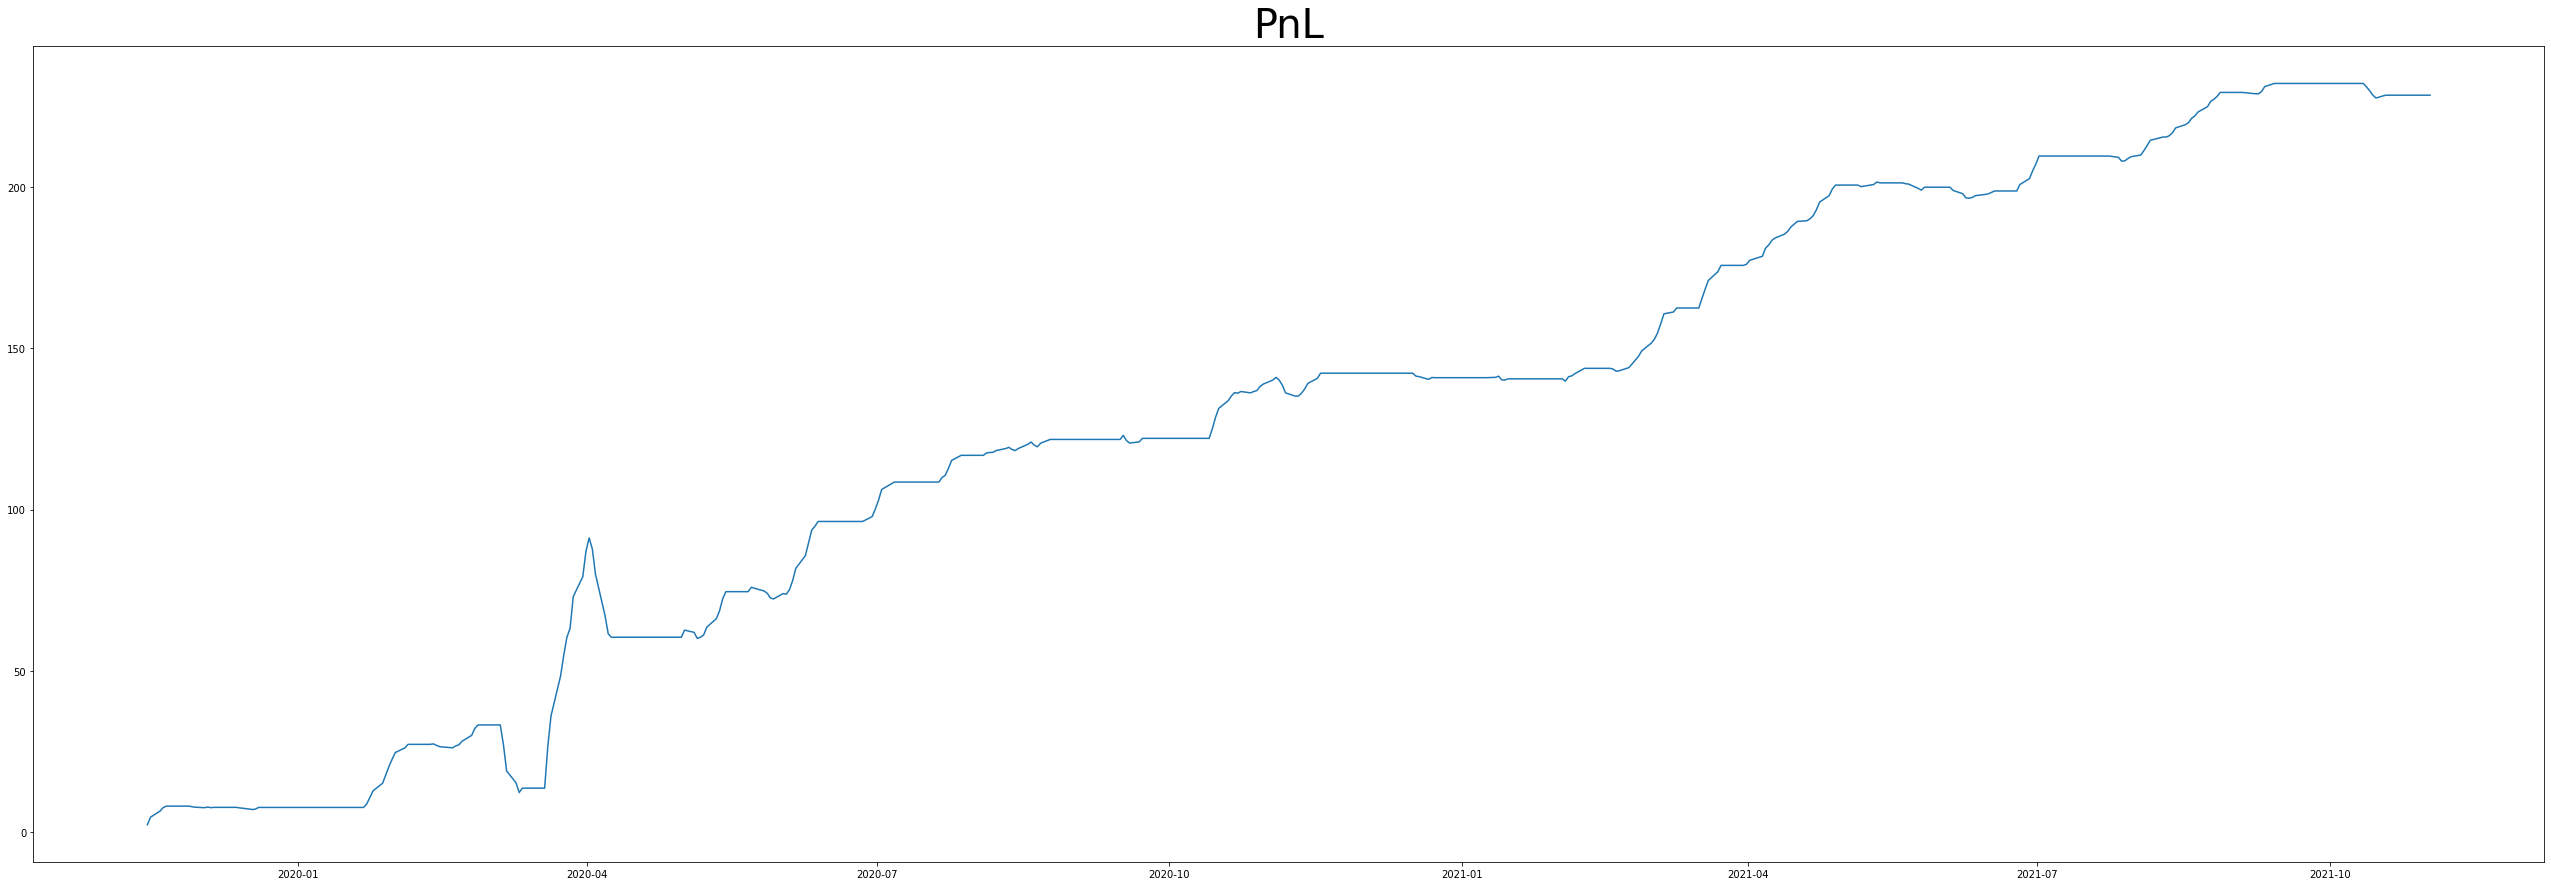

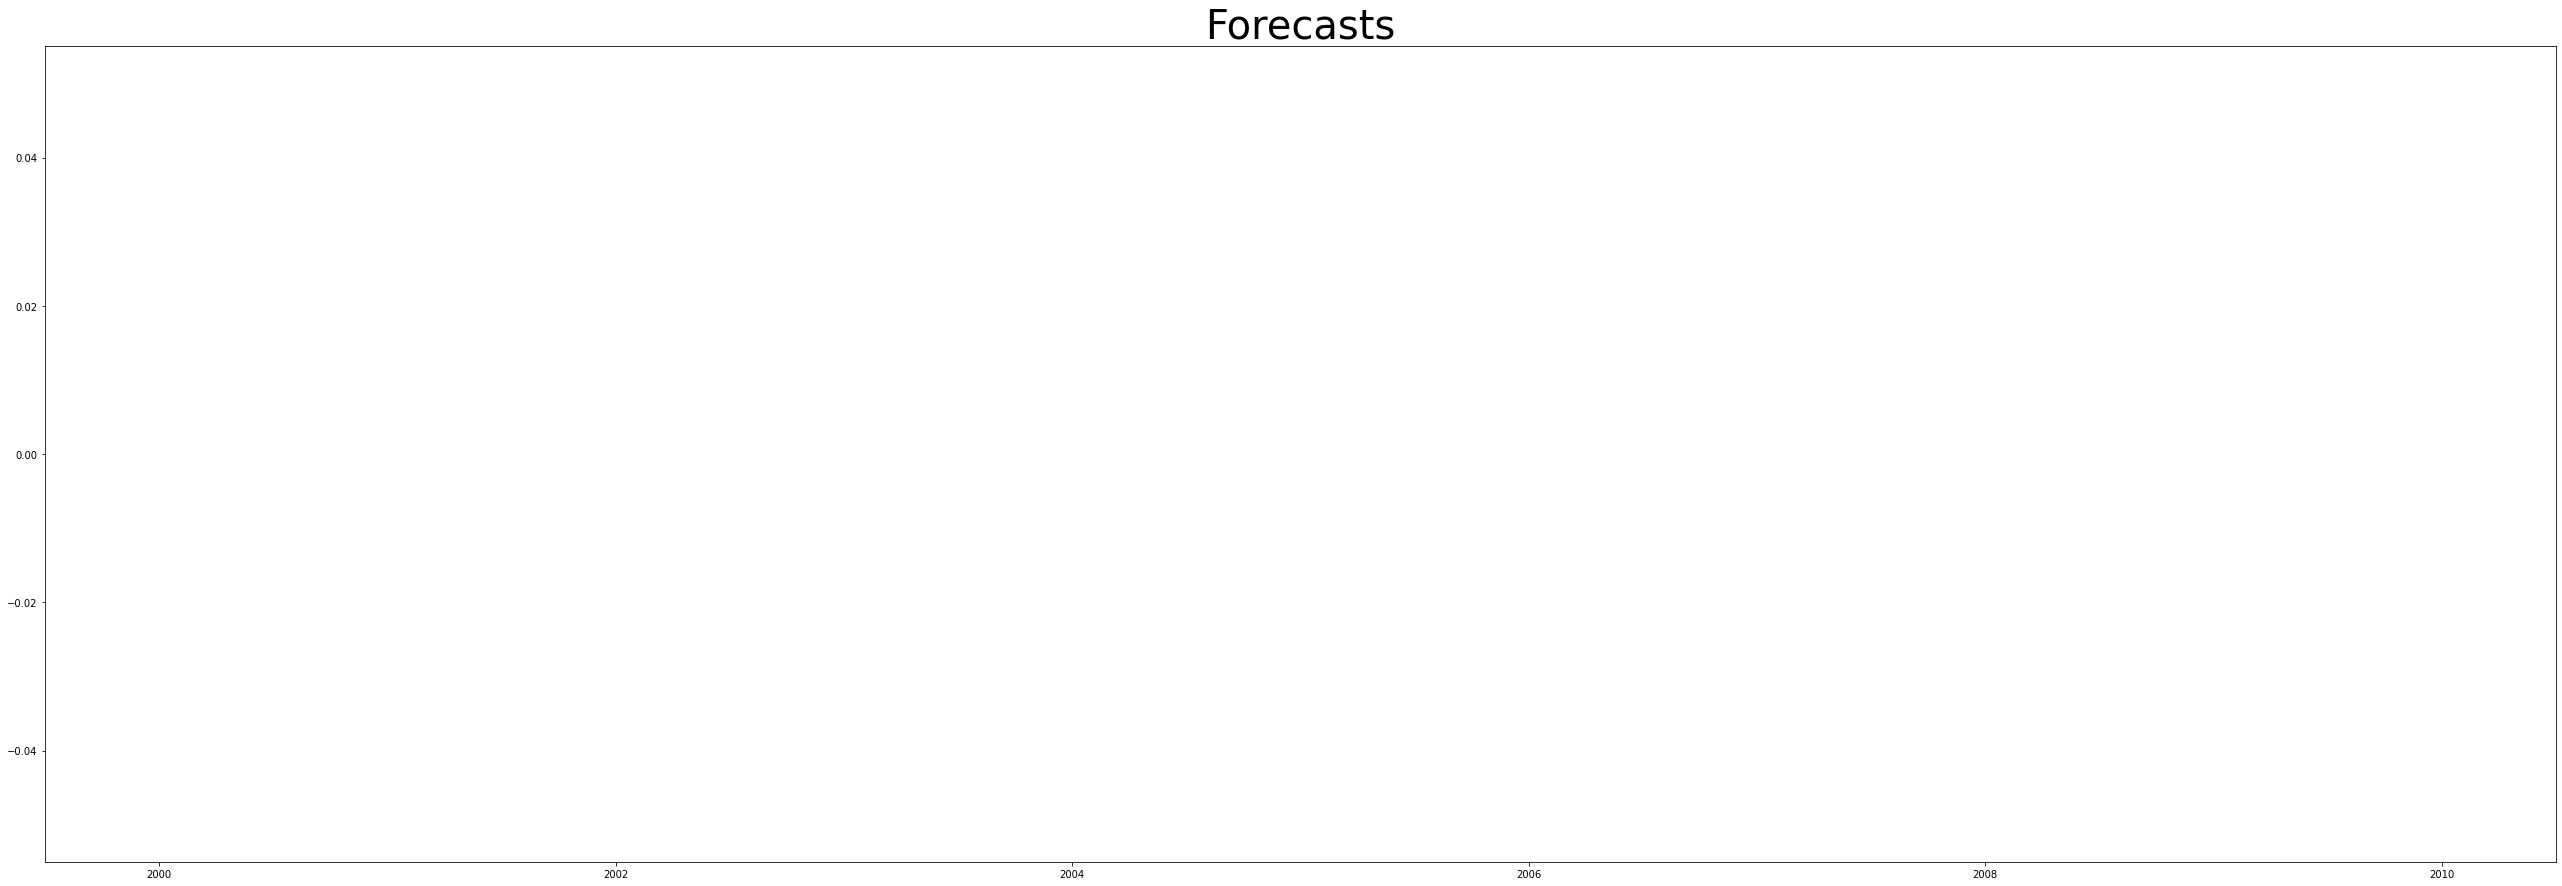

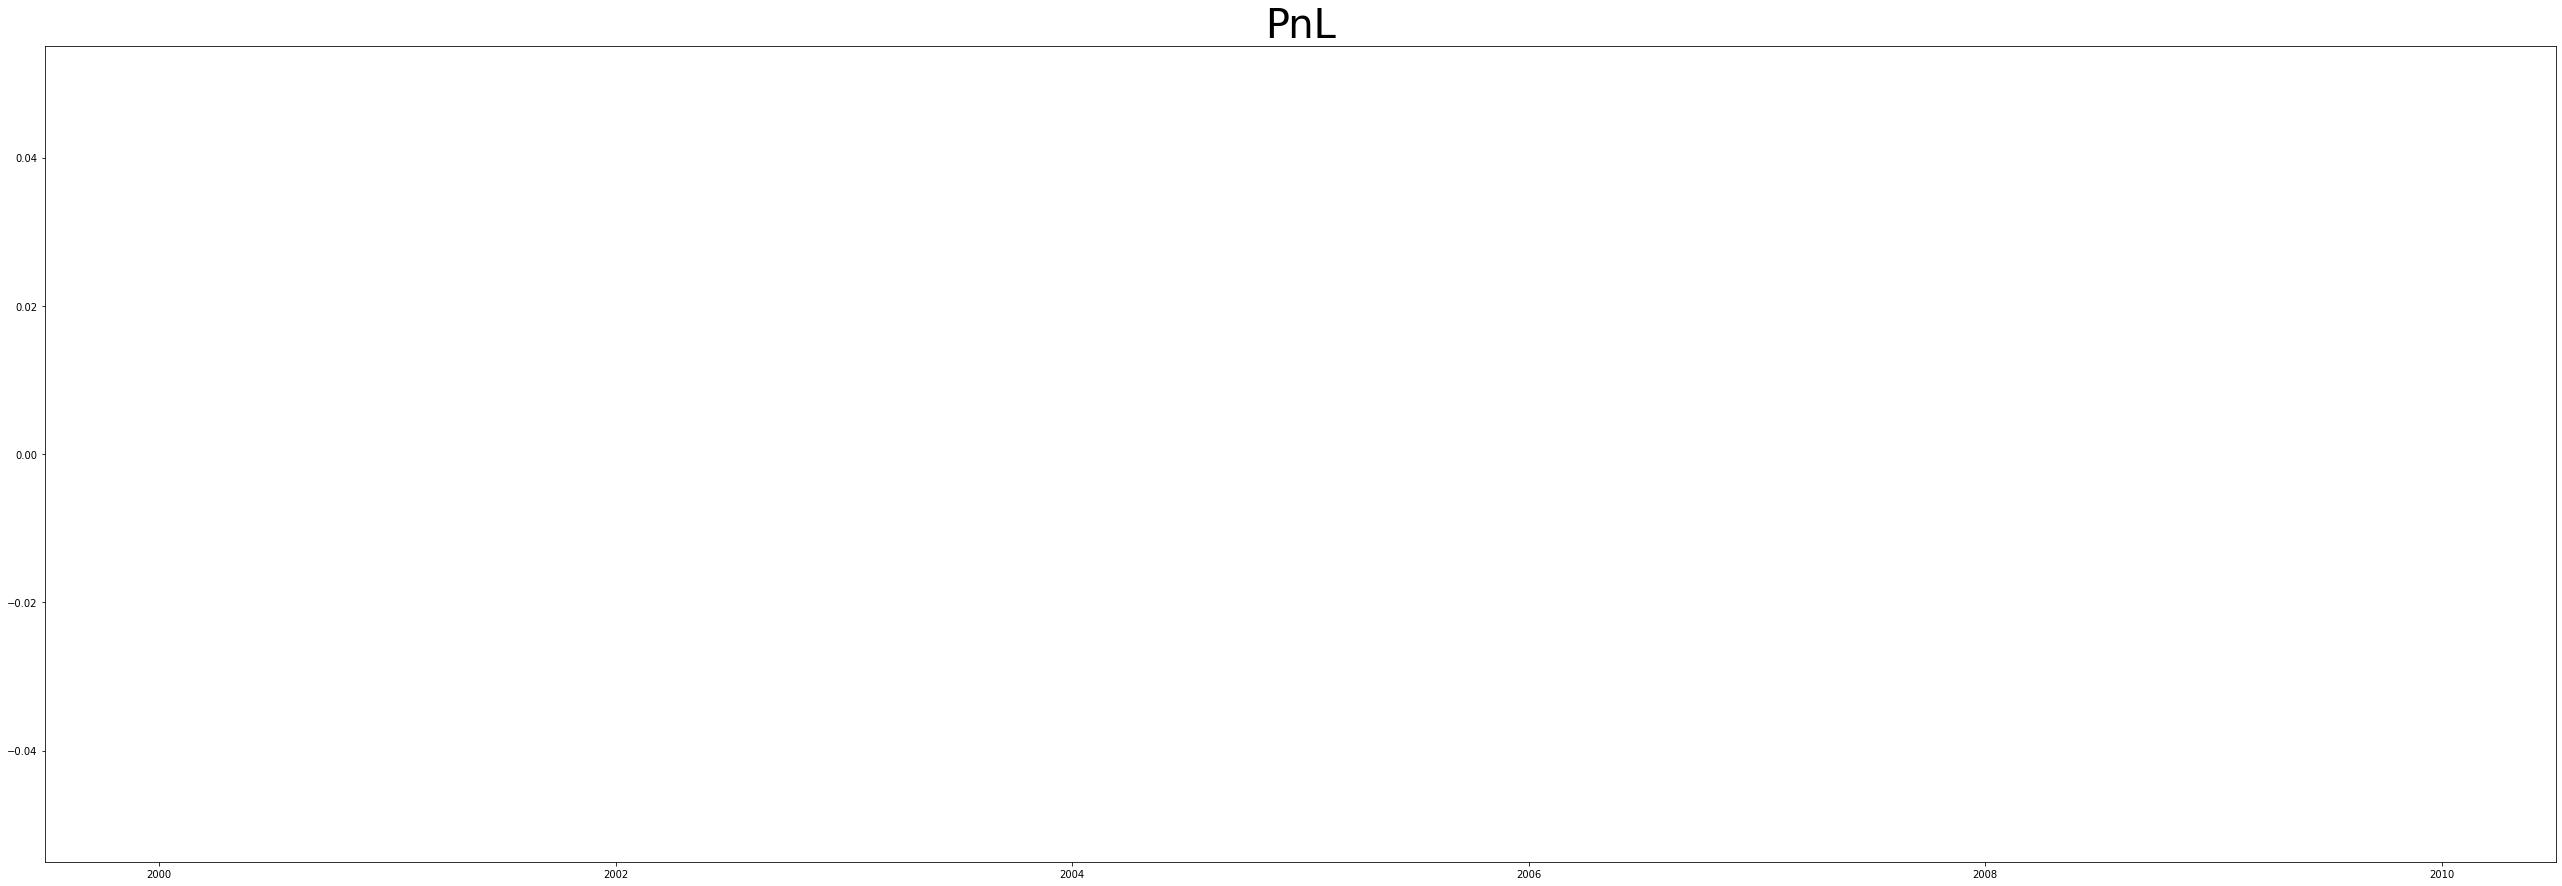

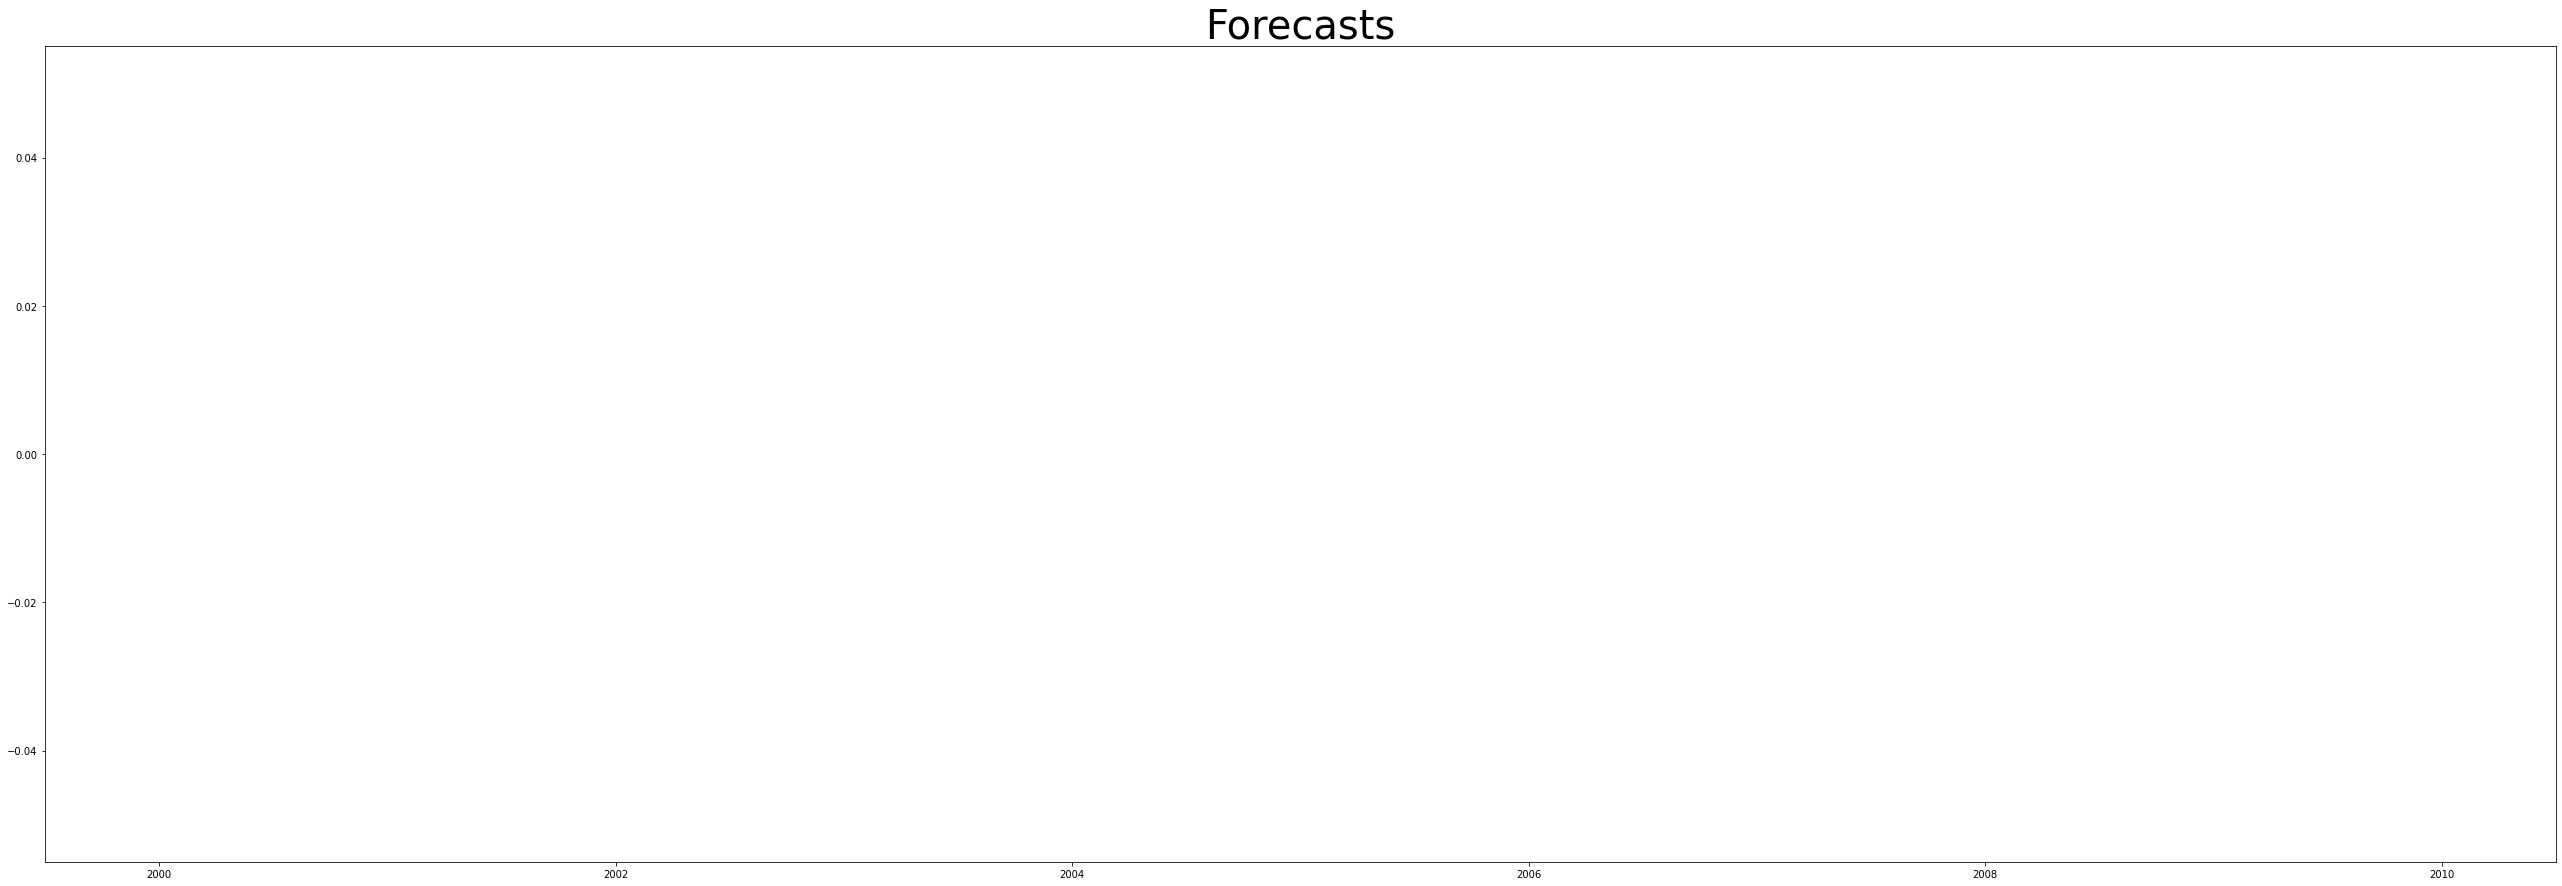

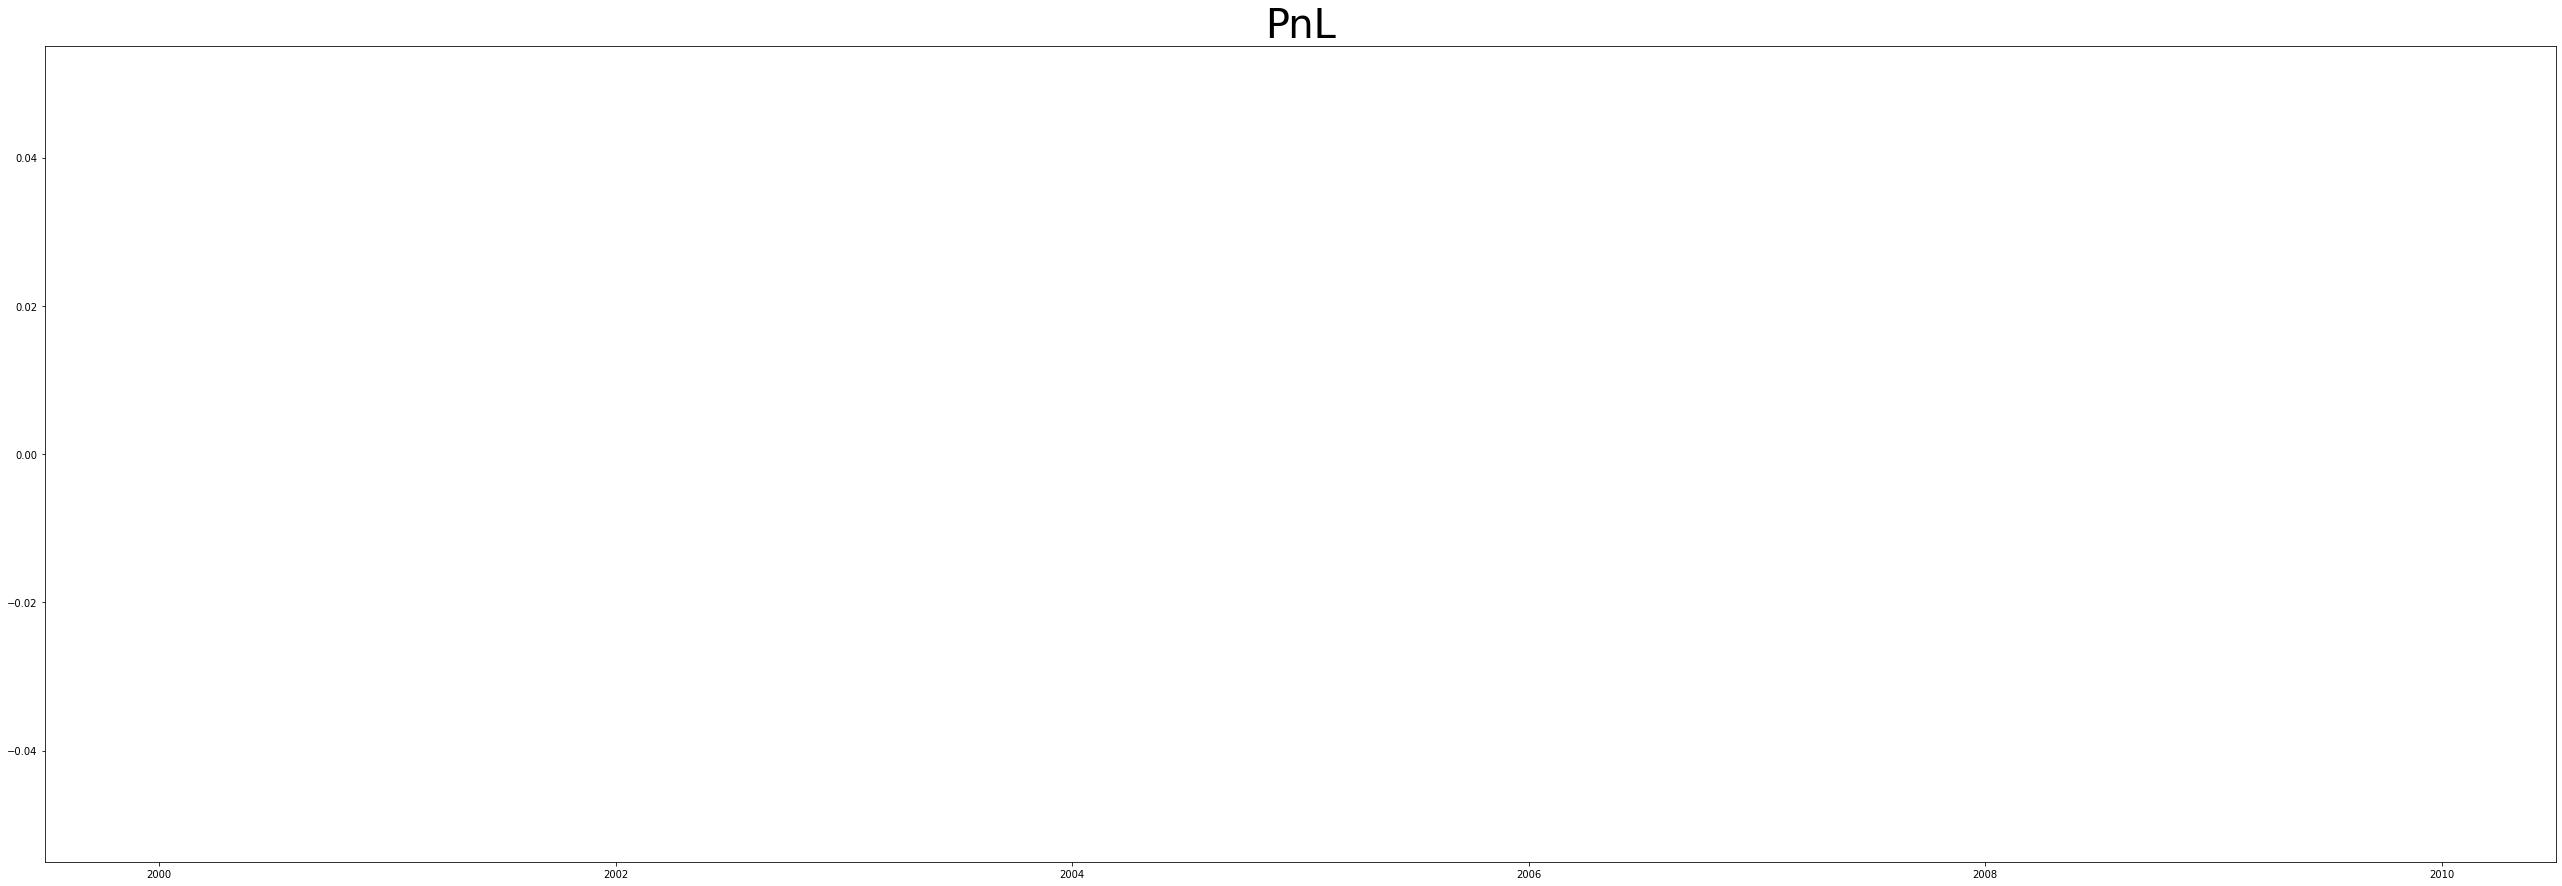

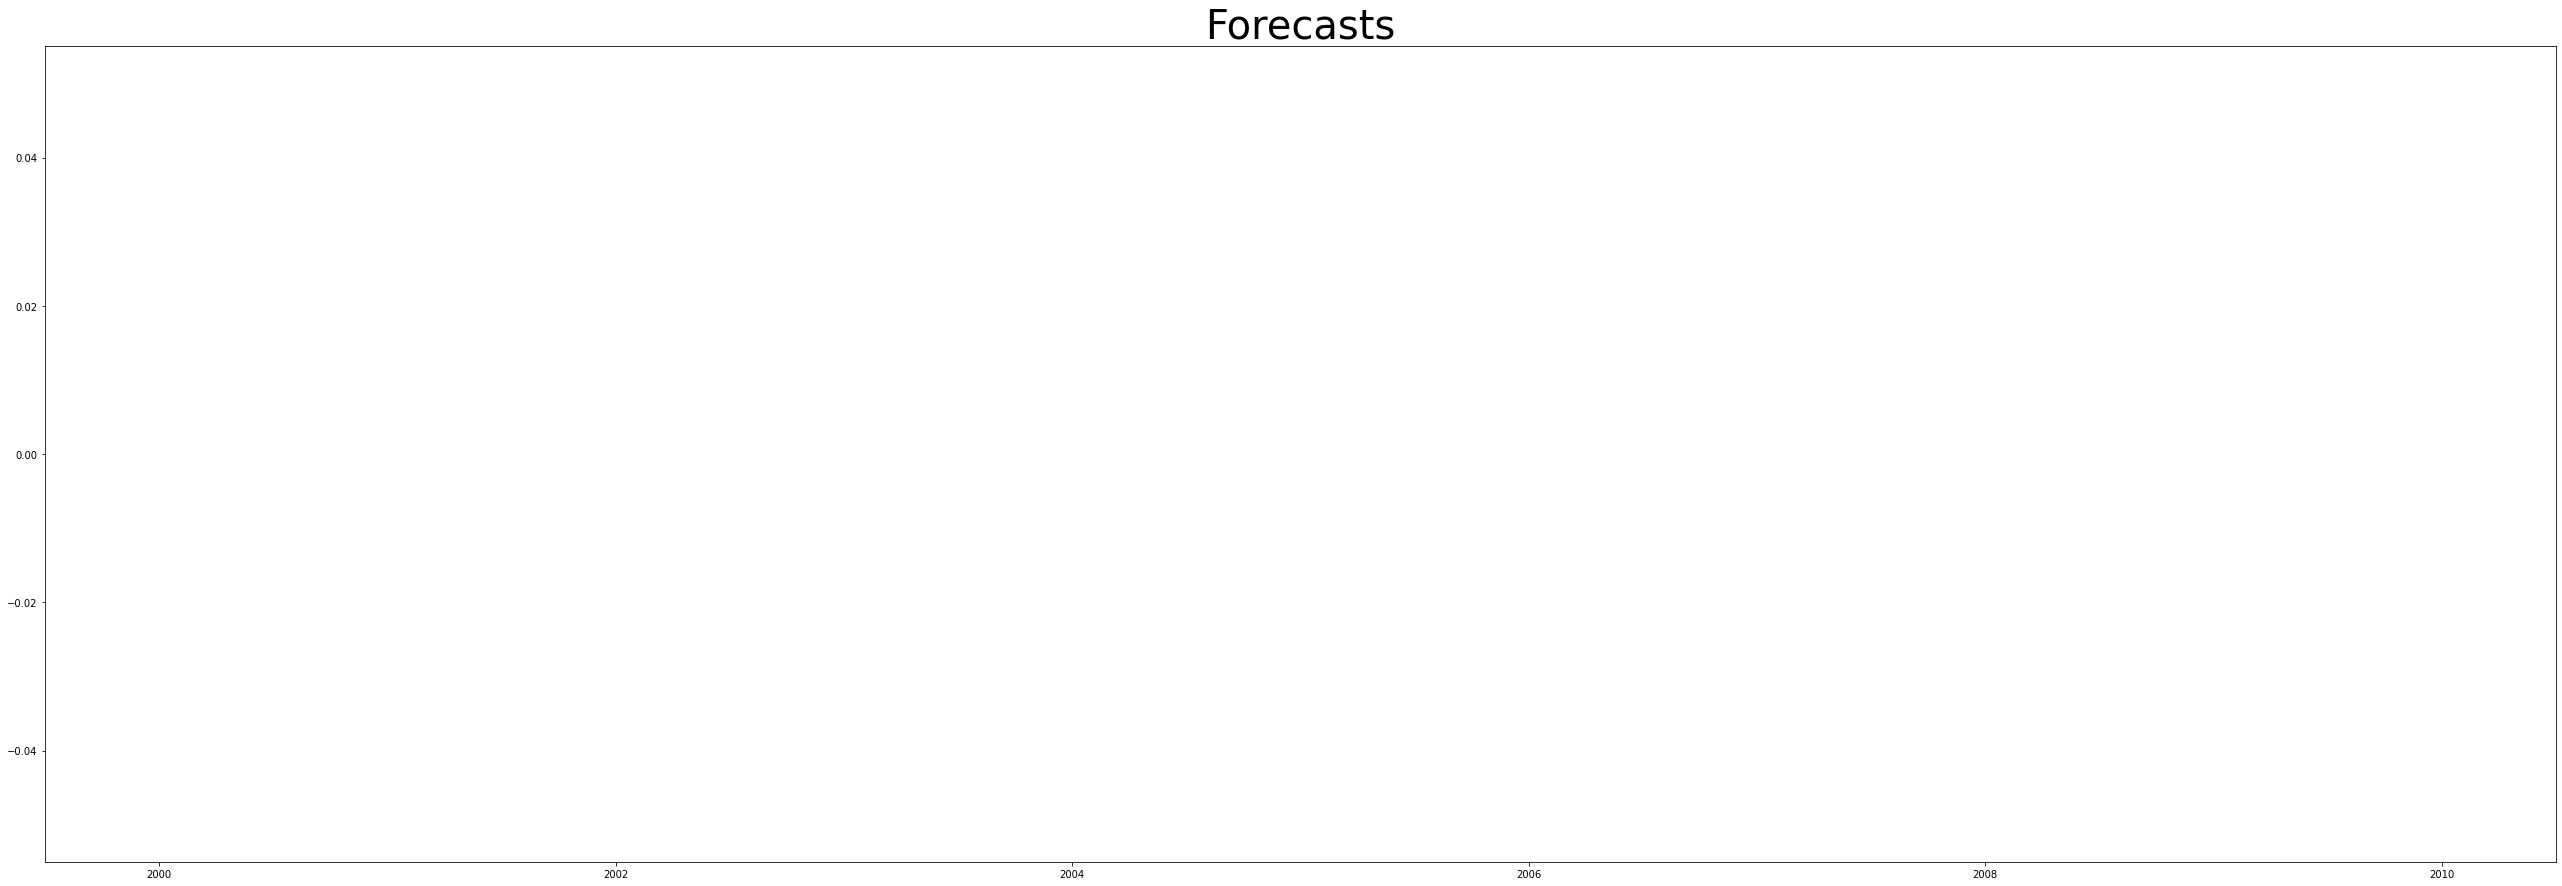

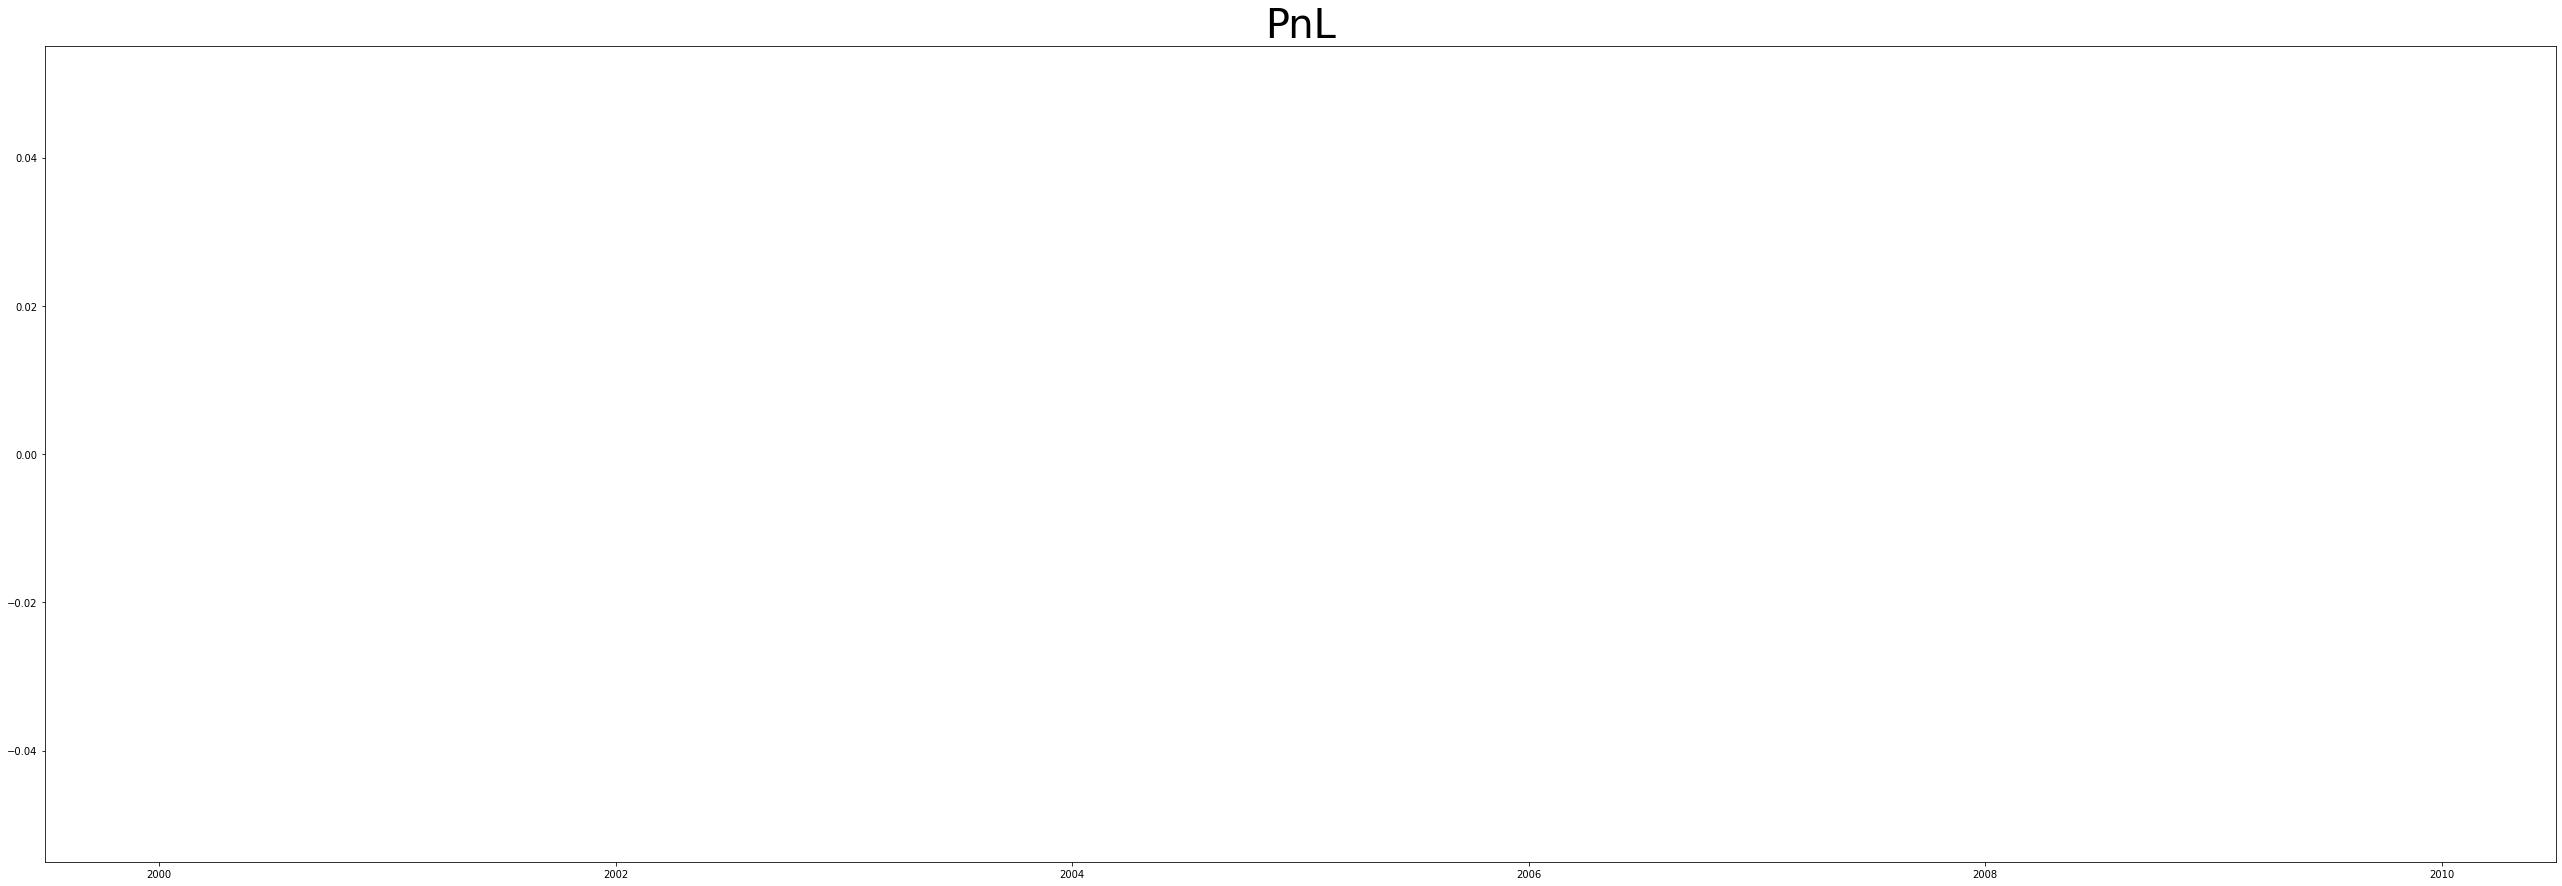

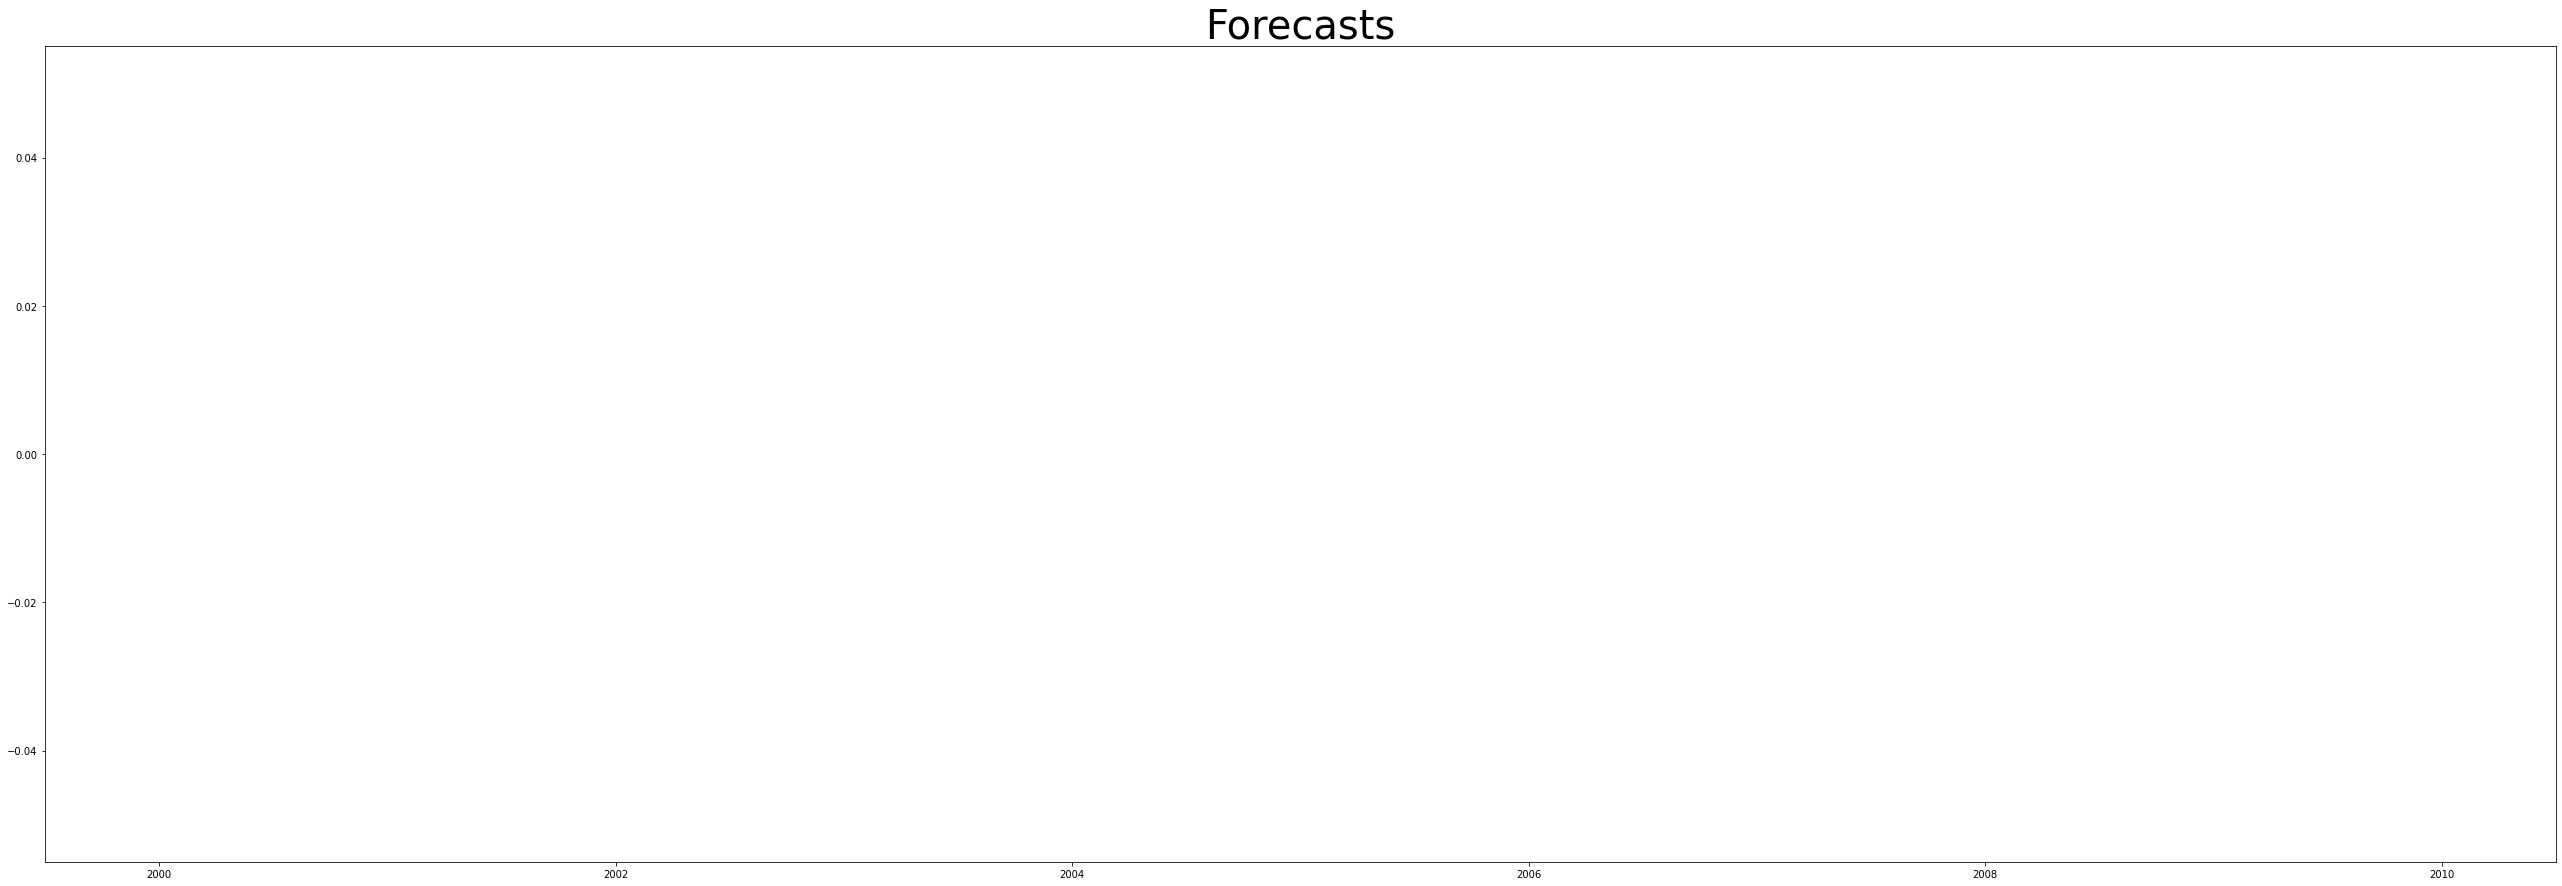

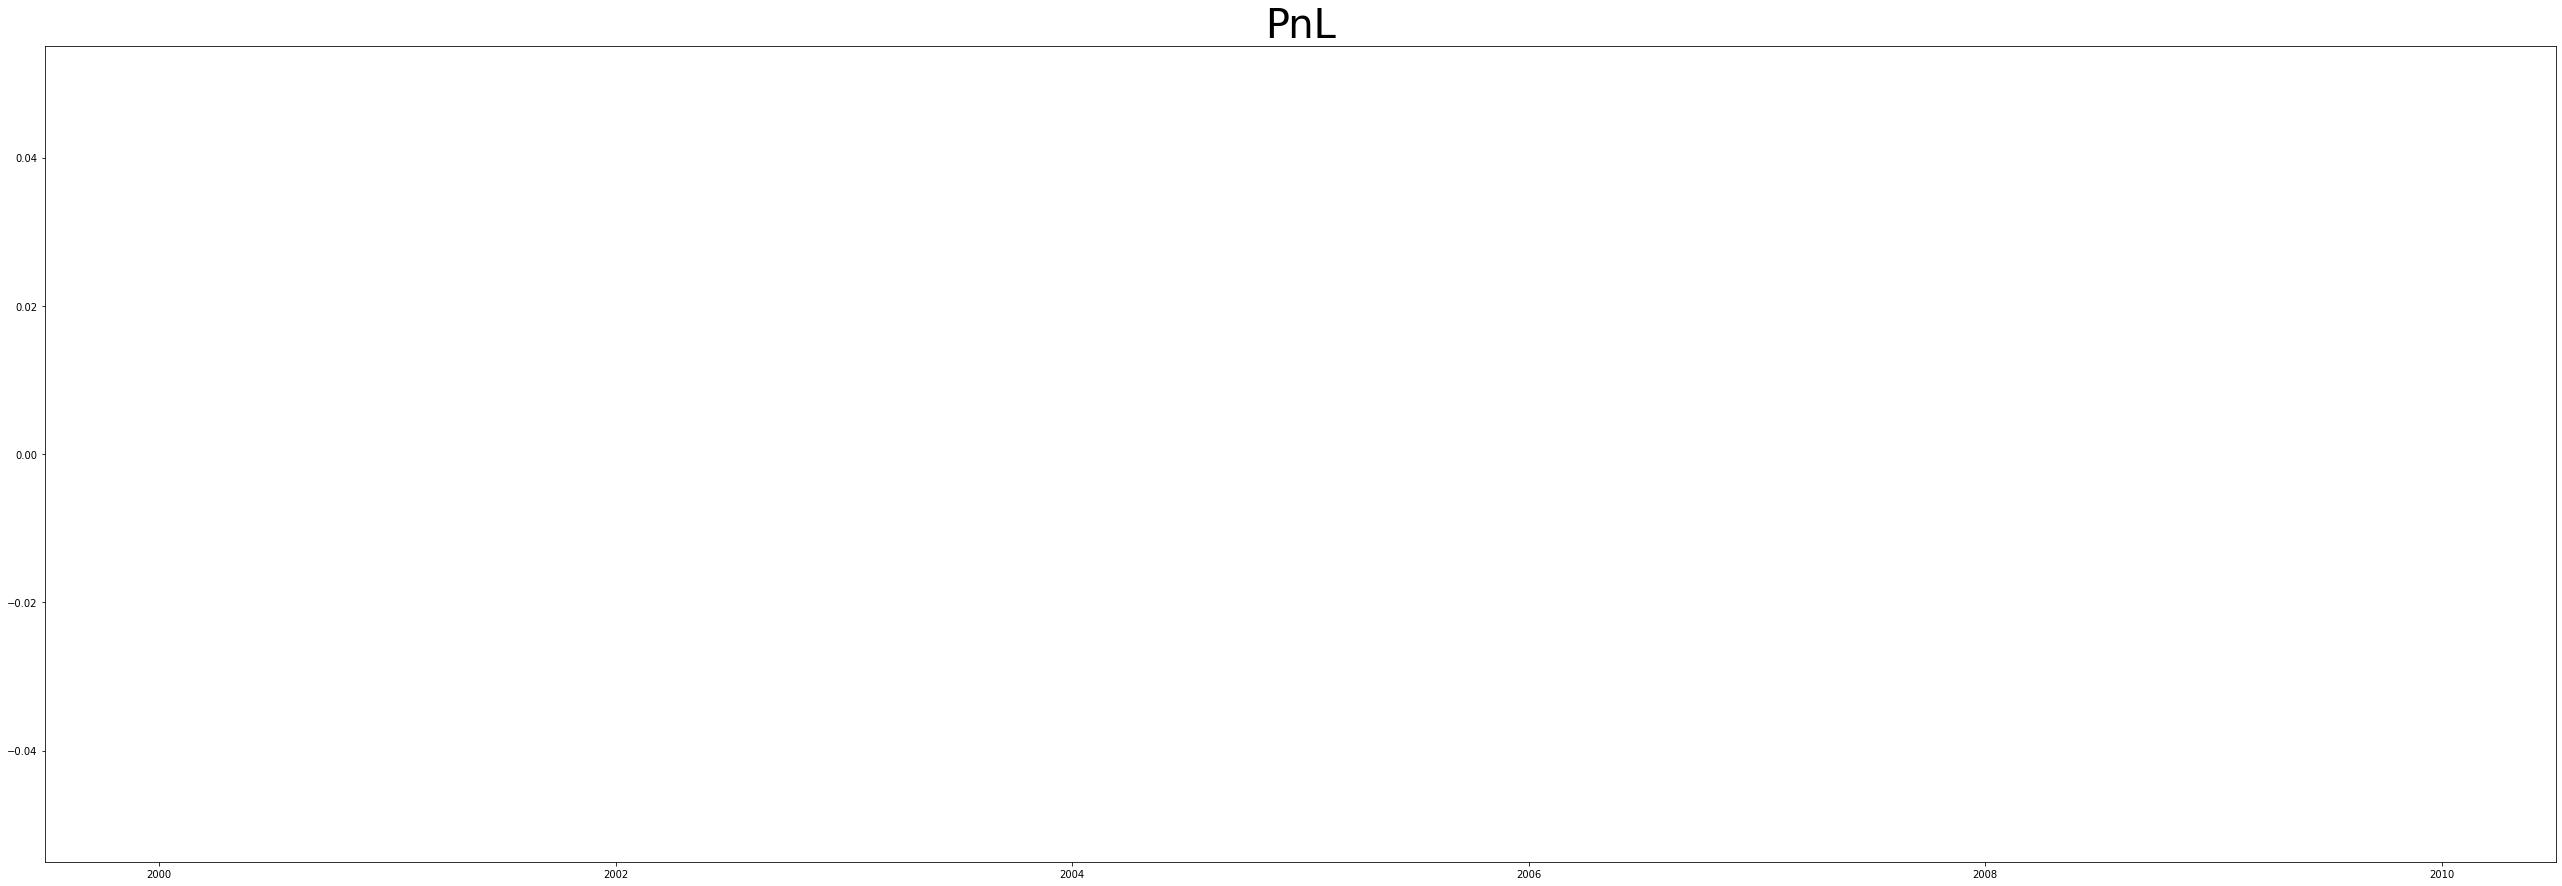

In [ ]:
for i in range(10):
    plt.figure(figsize=(45,15))

    plt.plot(forcast_df['close'][i*1000:(i+1)*1000])
    plt.plot(forcast_df['pointForecast'][i*1000:(i+1)*1000])
    plt.title('Forecasts',fontsize=40)
    plt.show()

    plt.figure(figsize=(45,15))

    plt.plot(pnl_df['pnl'][i*1000:(i+1)*1000].cumsum())
    plt.title('PnL',fontsize=40)
    plt.show()

# Metadata analysis

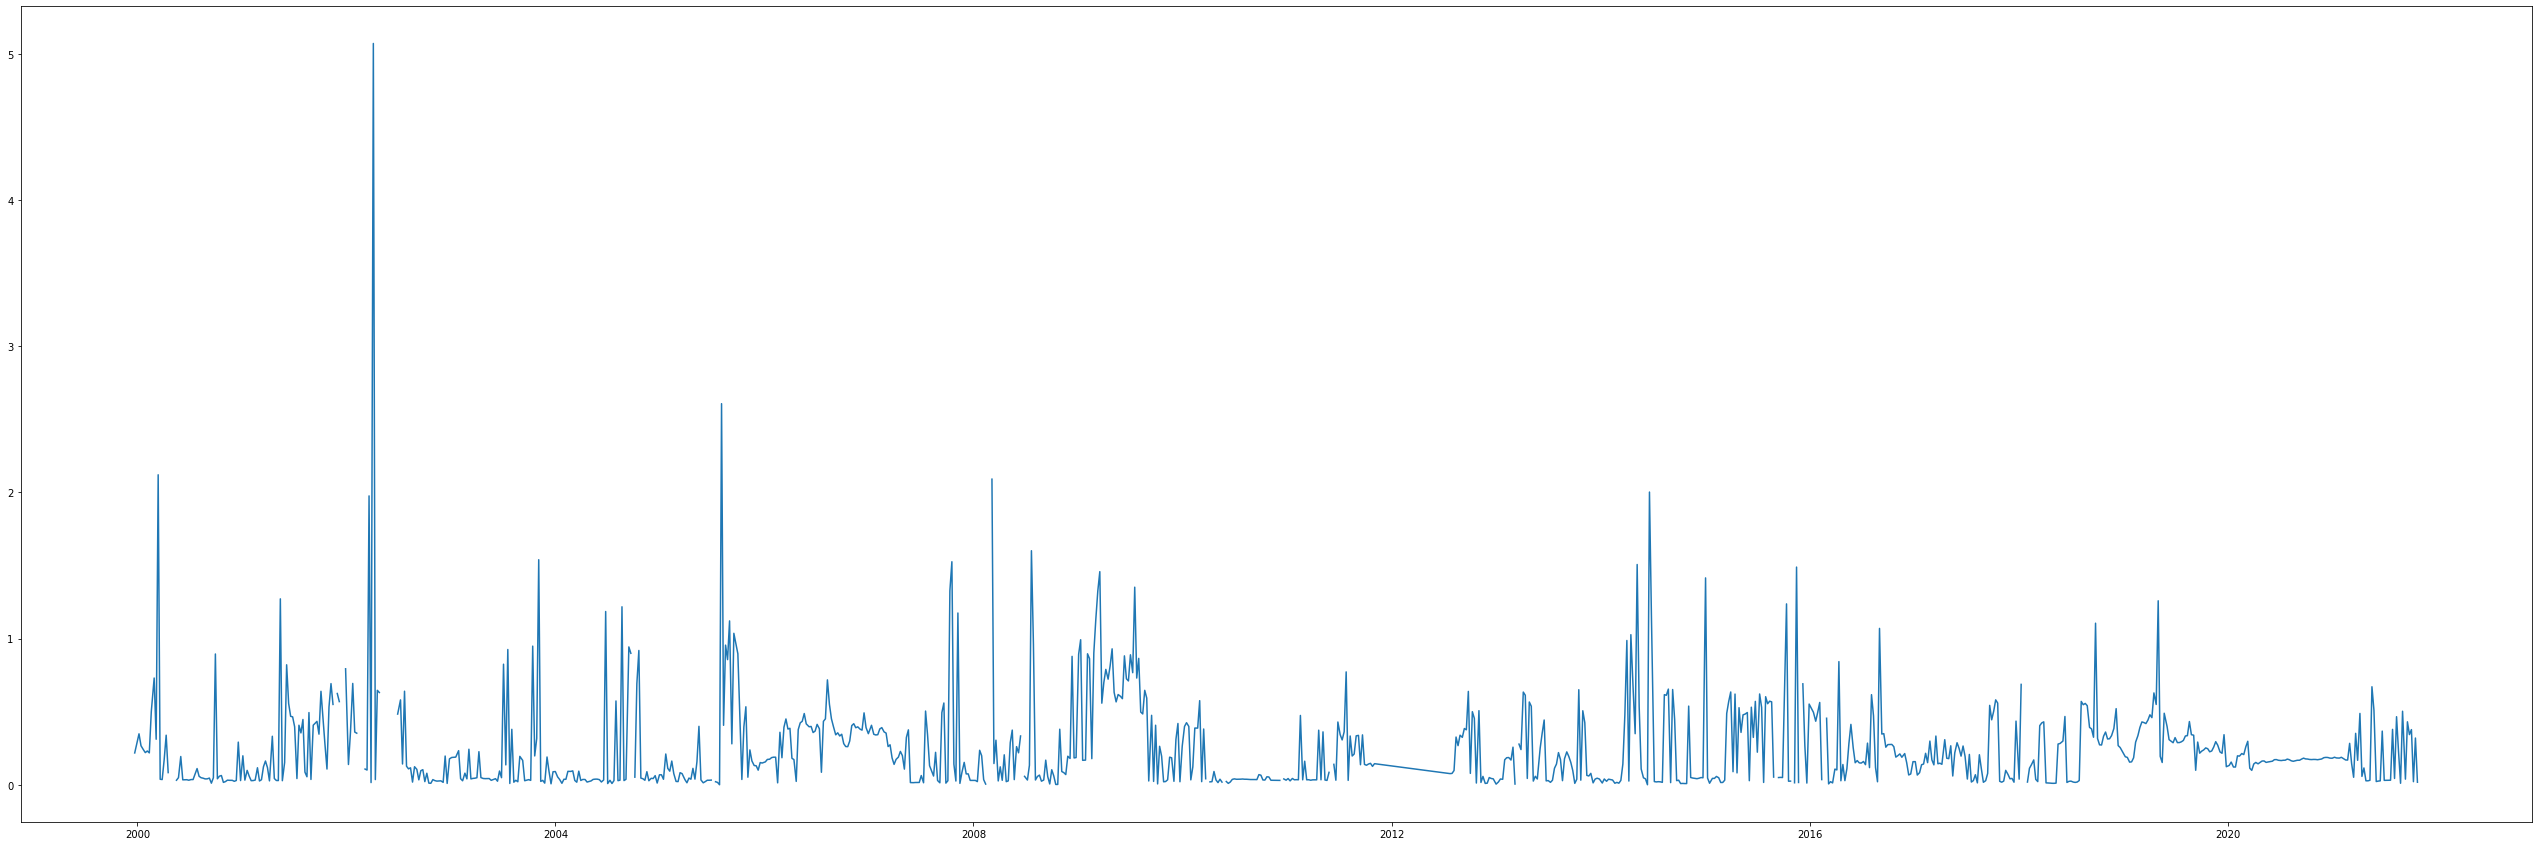

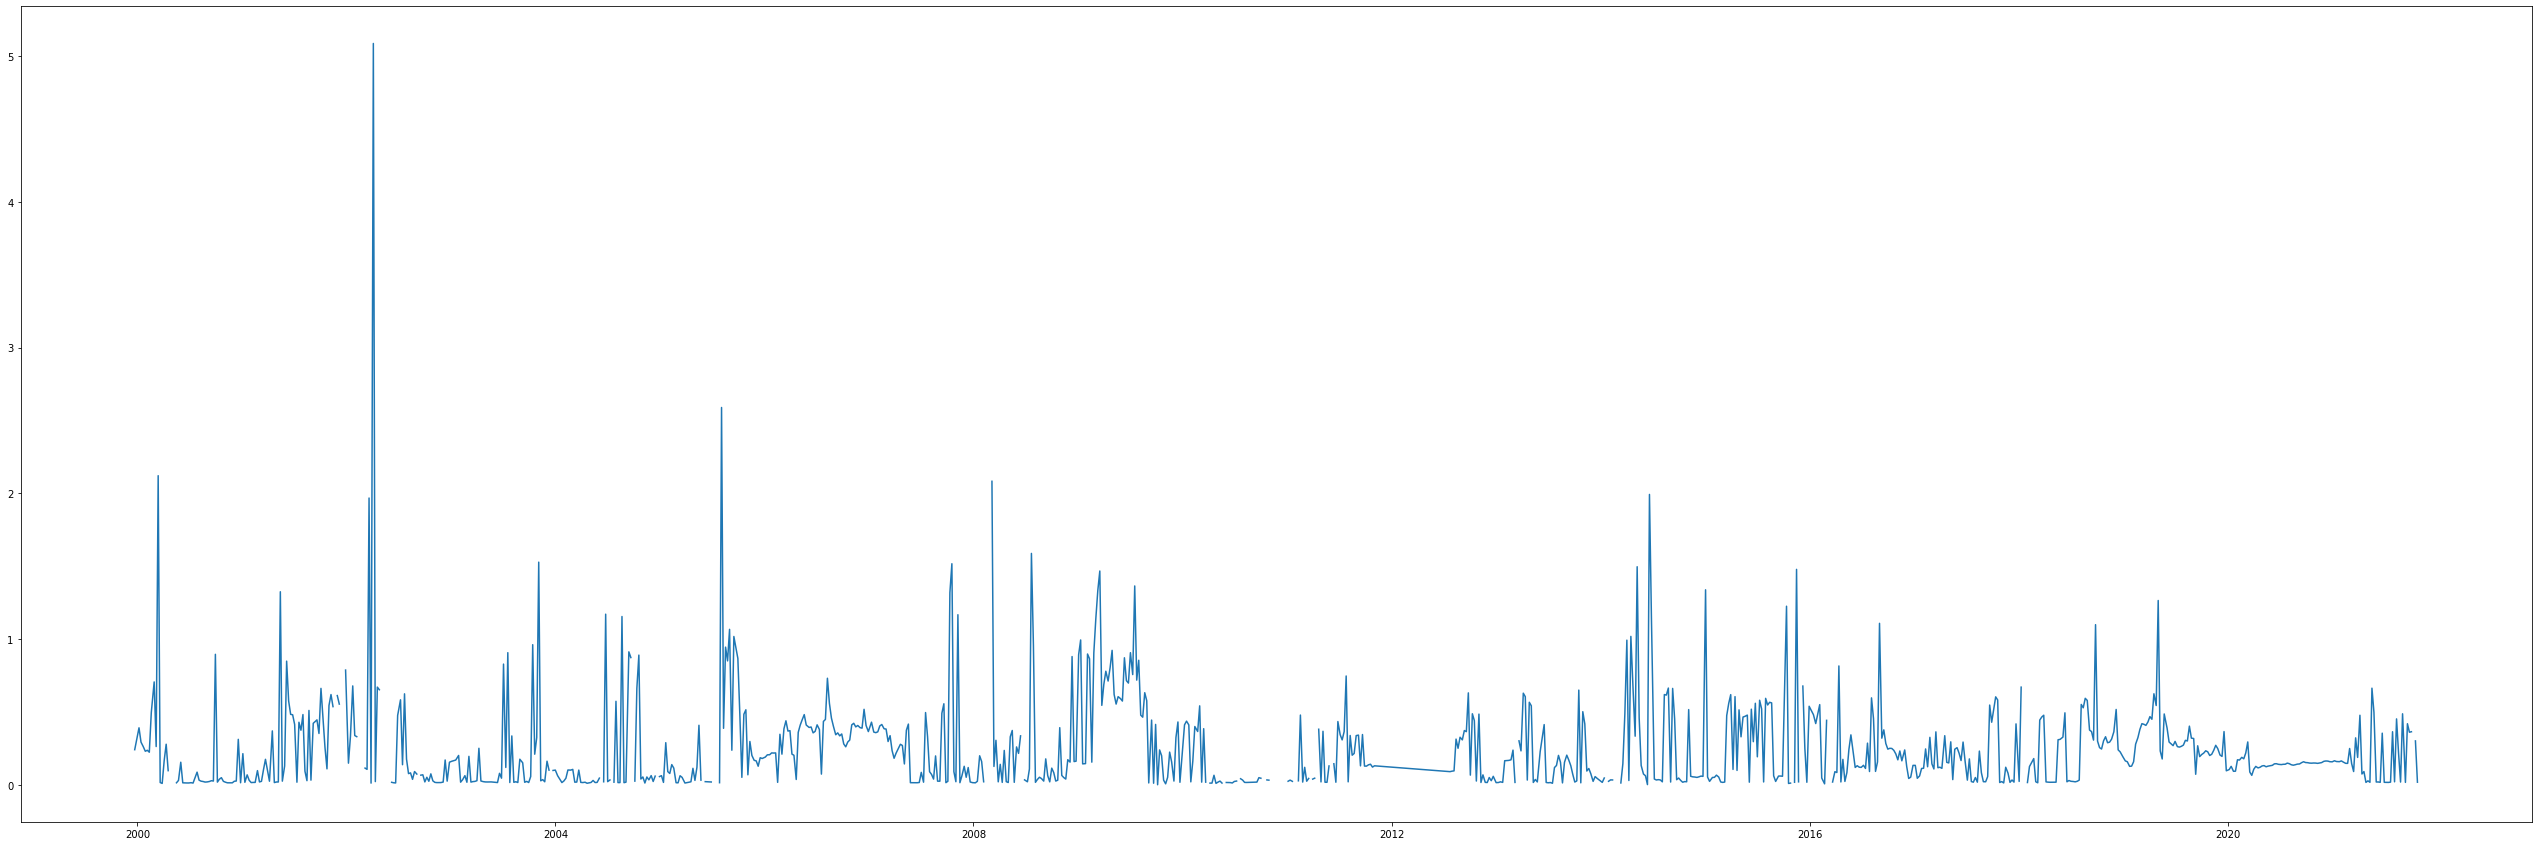

In [ ]:
plt.figure(figsize=(45,15))

for i in range(1,2):
    plt.plot(metadata_df[f'ar.L{i}.close'])

# plt.legend(['ar.L1.close','ar.L1.close'],fontsize=40)

plt.show()

plt.figure(figsize=(45,15))

for i in range(1,2):
    plt.plot(metadata_df[f'ma.L{i}.close'])
    
# plt.legend(['ma.L1.close','ma.L1.close'],fontsize=40)

plt.show()

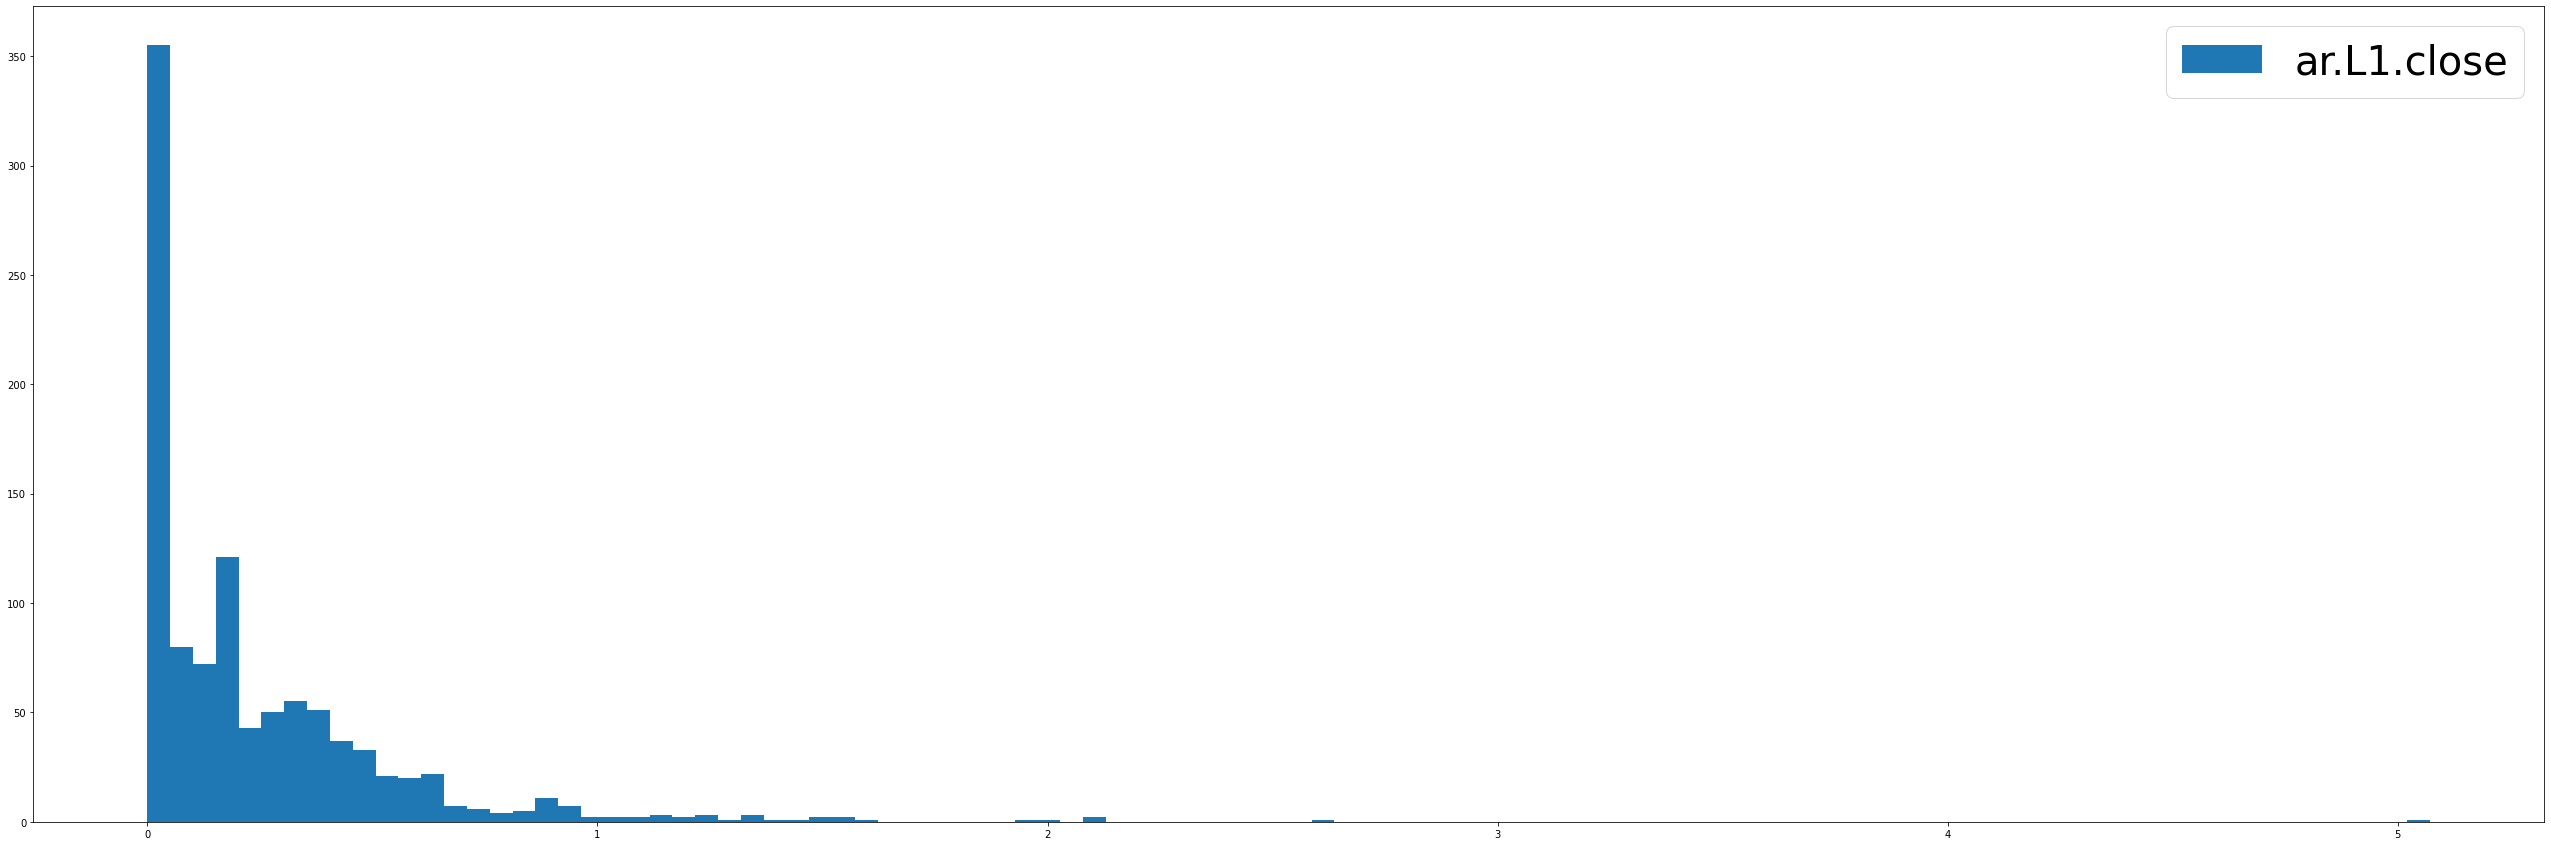

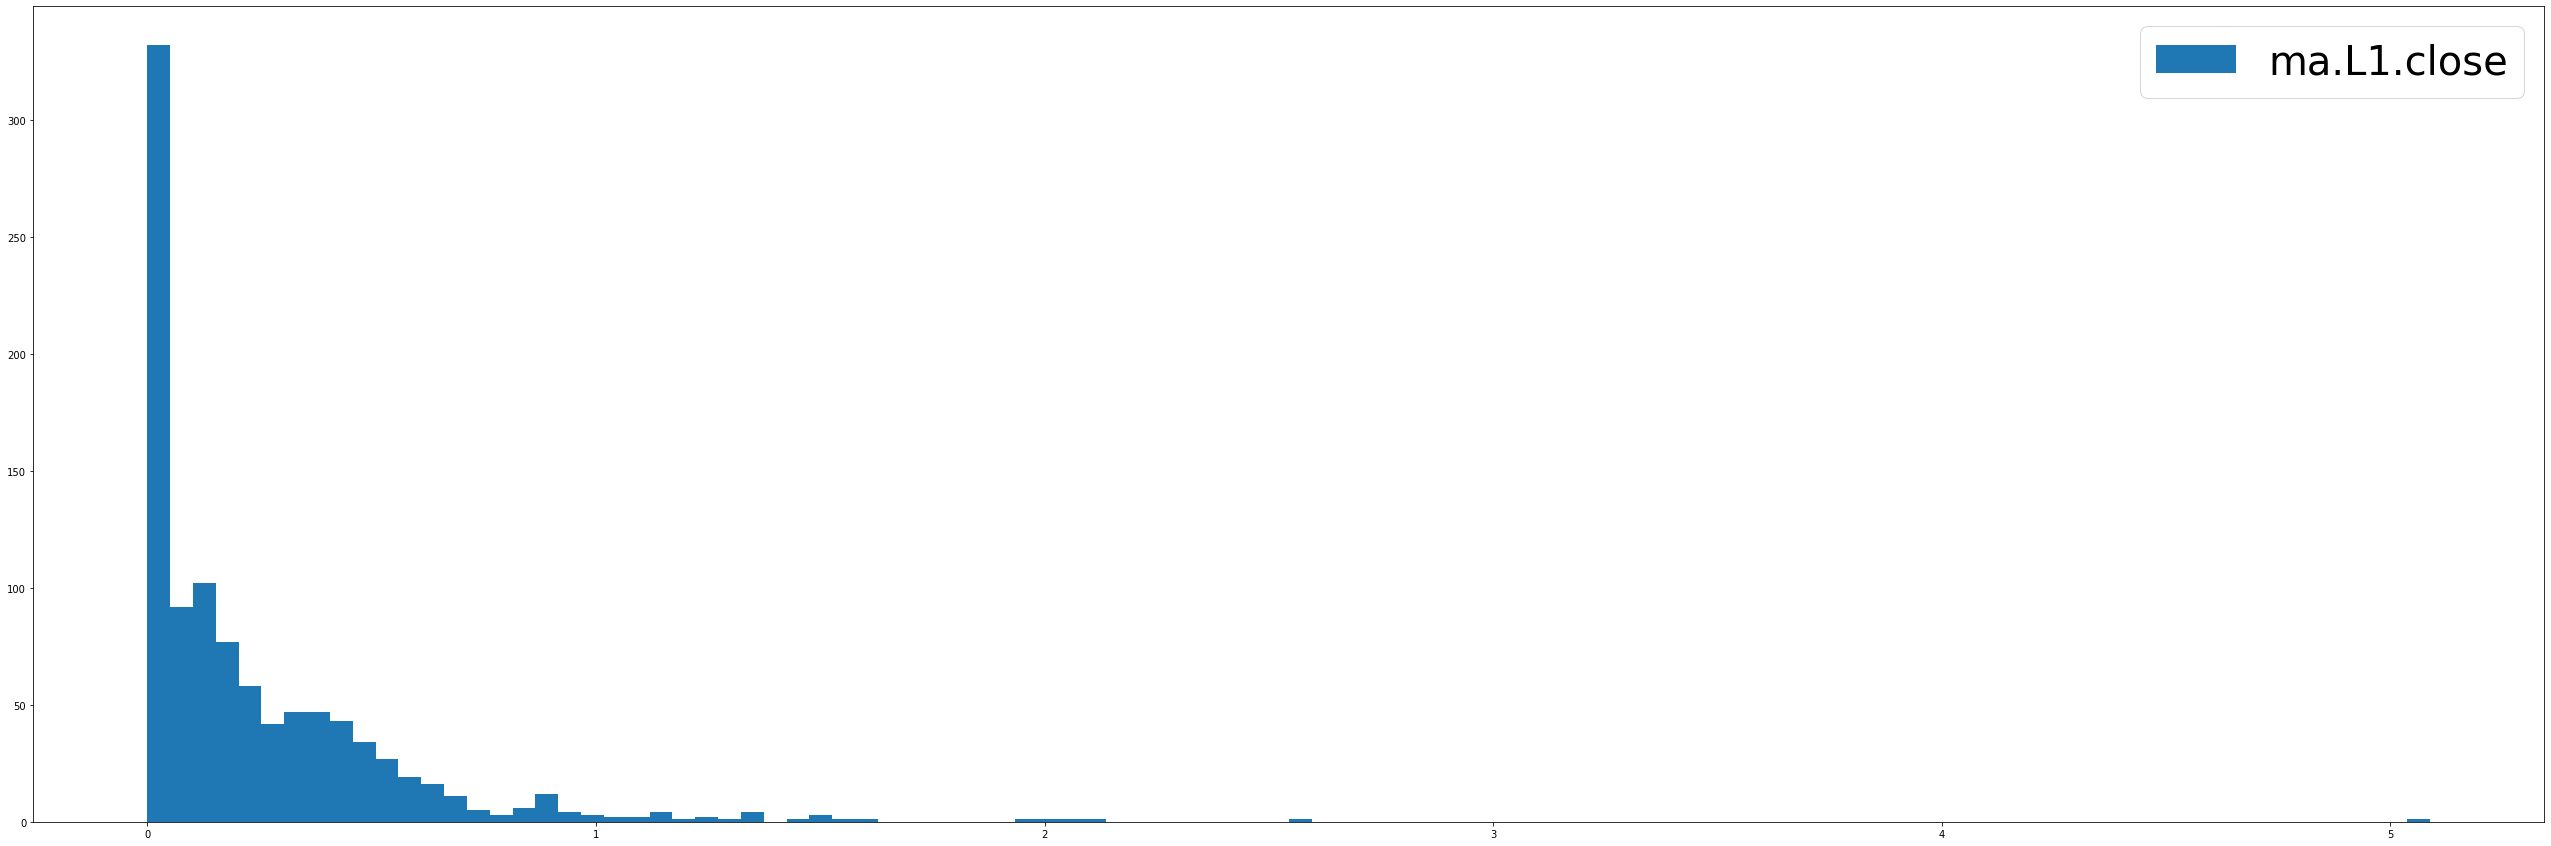

In [ ]:
plt.figure(figsize=(45,15))

for i in range(1,2):
    plt.hist(metadata_df[f'ar.L{i}.close'],bins=100)

plt.legend(['ar.L1.close','ar.L1.close'],fontsize=40)

plt.show()

plt.figure(figsize=(45,15))

for i in range(1,2):
    plt.hist(metadata_df[f'ma.L{i}.close'],bins=100)
    
plt.legend(['ma.L1.close','ma.L1.close'],fontsize=40)

plt.show()